In [49]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [50]:
import pandas as pd
from newGraphDiscovery import GraphDiscoveryNew
from Modes import ModeContainer
import numpy as onp
import matplotlib.pyplot as plt
from tqdm import tqdm
import networkx as nx
from sklearn.preprocessing import StandardScaler

# Study all available data

In [51]:
df=pd.read_csv("france_covid_data.csv")
df=df.drop("date",axis=1)
df

new_hospitalized_patients  cumulative_hospitalized_patients  \
0                        589.0                          272296.0   
1                       1217.0                          273513.0   
2                       1627.0                          275140.0   
3                       1404.0                          276544.0   
4                       1317.0                          277861.0   
..                         ...                               ...   
502                      756.0                          822964.0   
503                      387.0                          823351.0   
504                      145.0                          823496.0   
505                      900.0                          824396.0   
506                      883.0                          825279.0   

     current_hospitalized_patients  new_intensive_care_patients  \
0                          24620.0                        107.0   
1                          24645.0                        229.0   
2                          24743.0                        251.0   
3                          24560.0                        209.0   
4                          24407.0                        177.0   
..                             ...                          ...   
502                        19272.0                         77.0   
503                        18901.0                         42.0   
504                        18935.0                         13.0   
505                        18742.0                         94.0   
506                        18290.0                        106.0   

     cumulative_intensive_care_patients  current_intensive_care_patients  \
0                               42622.0                           2650.0   
1                               42851.0                           2694.0   
2                               43102.0                           2666.0   
3                               43311.0                           2652.0   
4                               43488.0                           2625.0   
..                                  ...                              ...   
502                            136447.0                           1233.0   
503                            136489.0                           1213.0   
504                            136502.0                           1214.0   
505                            136596.0                           1199.0   
506                            136702.0                           1173.0   

     school_closing  workplace_closing  cancel_public_events  \
0               2.0                2.0                   2.0   
1               2.0                2.0                   2.0   
2               2.0                2.0                   2.0   
3               2.0                2.0                   2.0   
4               2.0                2.0                   2.0   
..              ...                ...                   ...   
502             0.0                1.0                   0.0   
503             0.0                1.0                   0.0   
504             0.0                1.0                   0.0   
505             0.0                1.0                   0.0   
506             0.0                1.0                   0.0   

     restrictions_on_gatherings  ...  cumulative_confirmed  \
0                           4.0  ...             2556944.0   
1                           4.0  ...             2559904.0   
2                           4.0  ...             2571299.0   
3                           4.0  ...             2597756.0   
4                           4.0  ...             2617683.0   
..                          ...  ...                   ...   
502                         0.0  ...             3558022.0   
503                         0.0  ...             3558022.0   
504                         0.0  ...             3558022.0   
505                         0.0  ...             3558022.0   
506                

In [52]:

node_names=df.columns
X=df.to_numpy()
X=(X-onp.mean(X,axis=0))/onp.std(X,axis=0)

In [53]:
node_names

Index(['new_hospitalized_patients', 'cumulative_hospitalized_patients',
       'current_hospitalized_patients', 'new_intensive_care_patients',
       'cumulative_intensive_care_patients', 'current_intensive_care_patients',
       'school_closing', 'workplace_closing', 'cancel_public_events',
       'restrictions_on_gatherings', 'public_transport_closing',
       'stay_at_home_requirements', 'restrictions_on_internal_movement',
       'income_support', 'facial_coverings', 'vaccination_policy',
       'stringency_index', 'new_confirmed', 'new_deceased', 'new_recovered',
       'new_tested', 'cumulative_confirmed', 'cumulative_deceased',
       'cumulative_recovered', 'cumulative_tested', 'new_persons_vaccinated',
       'cumulative_persons_vaccinated', 'new_persons_fully_vaccinated',
       'cumulative_persons_fully_vaccinated', 'new_vaccine_doses_administered',
       'cumulative_vaccine_doses_administered'],
      dtype='object')

In [54]:
modes=ModeContainer.make_container(
    X.T,
    onp.array(node_names),
    {'name':'linear','beta':0.1,'type':'individual','default':True},
    {'name':'quadratic','beta':0.01,'type':'pairwise','default':True},
    {'name':'gaussian','beta':0.001,'type':'combinatorial','default':True,'l':1},
)

In [55]:

graph_discovery=GraphDiscoveryNew(X.T,onp.array(node_names),modes)

In [56]:
modes.matrices[1].shape

(31, 31, 507, 507)

linear kernel (using gamma=2.58e+00)
 n/(n+s)=0.69, Z=0.99
quadratic kernel (using gamma=2.69e-06)
 n/(n+s)=0.04, Z=0.93
what about median ? 65588.41104814524
gaussian kernel (using gamma=5.49e+04)
 n/(n+s)=0.08, Z=0.72
cancel_public_events has ancestors with quadratic kernel (n/(s+n)=0.04)
ancestors : ['new_hospitalized_patients', 'cumulative_hospitalized_patients', 'current_hospitalized_patients', 'new_intensive_care_patients', 'cumulative_intensive_care_patients', 'current_intensive_care_patients', 'school_closing', 'workplace_closing', 'restrictions_on_gatherings', 'public_transport_closing', 'stay_at_home_requirements', 'restrictions_on_internal_movement', 'income_support', 'facial_coverings', 'vaccination_policy', 'stringency_index', 'new_confirmed', 'new_deceased', 'new_recovered', 'new_tested', 'cumulative_confirmed', 'cumulative_deceased', 'cumulative_recovered', 'cumulative_tested', 'new_persons_vaccinated', 'cumulative_persons_vaccinated', 'new_persons_fully_vaccinated', 'cu

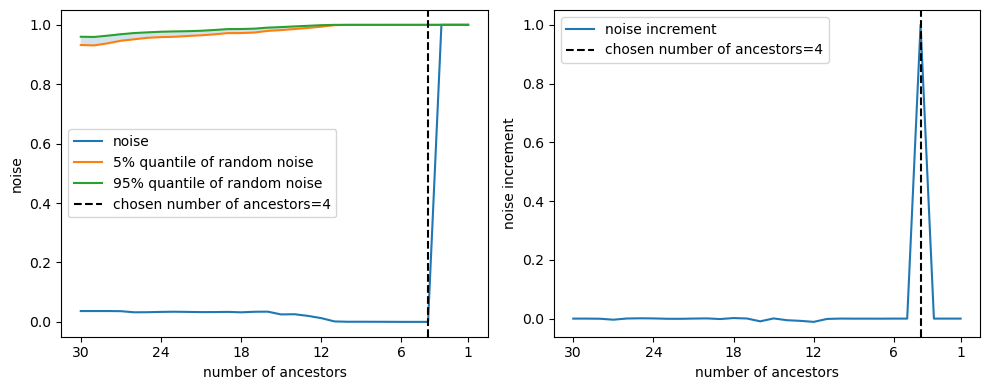

ancestors after pruning:  ['school_closing', 'workplace_closing', 'restrictions_on_gatherings', 'vaccination_policy'] 



In [58]:
graph_discovery.find_ancestors(
    'cancel_public_events',
    gamma='auto',
    kernel_chooser={'custom':lambda *args:'quadratic'},
    )

inspecting new_hospitalized_patients
linear kernel (using gamma=4.68e+00)
 n/(n+s)=0.64, Z=0.99
quadratic kernel (using gamma=1.07e+00)
 n/(n+s)=0.55, Z=0.96
what about median ? 50917.35136076476
gaussian kernel (using gamma=4.12e+04)
 n/(n+s)=0.33, Z=0.73
new_hospitalized_patients has ancestors with quadratic kernel (n/(s+n)=0.55)
ancestors : ['cumulative_hospitalized_patients', 'current_hospitalized_patients', 'new_intensive_care_patients', 'cumulative_intensive_care_patients', 'current_intensive_care_patients', 'school_closing', 'workplace_closing', 'cancel_public_events', 'restrictions_on_gatherings', 'public_transport_closing', 'stay_at_home_requirements', 'restrictions_on_internal_movement', 'income_support', 'facial_coverings', 'vaccination_policy', 'stringency_index', 'new_confirmed', 'new_deceased', 'new_recovered', 'new_tested', 'cumulative_confirmed', 'cumulative_deceased', 'cumulative_recovered', 'cumulative_tested', 'new_persons_vaccinated', 'cumulative_persons_vaccinated'

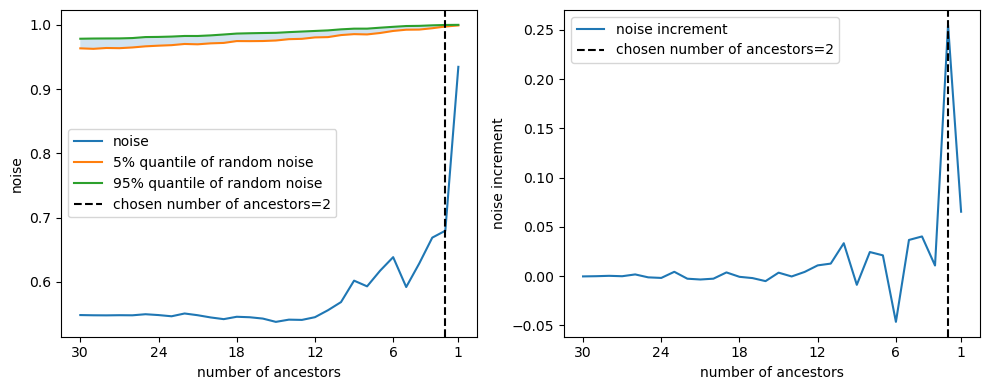

ancestors after pruning:  ['new_intensive_care_patients', 'cumulative_tested'] 



inspecting cumulative_hospitalized_patients
linear kernel (using gamma=2.05e-02)
 n/(n+s)=0.13, Z=0.99
quadratic kernel (using gamma=3.15e-03)
 n/(n+s)=0.09, Z=0.93
what about median ? 65309.65232920621
gaussian kernel (using gamma=5.53e+04)
 n/(n+s)=0.05, Z=0.72
cumulative_hospitalized_patients has ancestors with quadratic kernel (n/(s+n)=0.09)
ancestors : ['new_hospitalized_patients', 'current_hospitalized_patients', 'new_intensive_care_patients', 'cumulative_intensive_care_patients', 'current_intensive_care_patients', 'school_closing', 'workplace_closing', 'cancel_public_events', 'restrictions_on_gatherings', 'public_transport_closing', 'stay_at_home_requirements', 'restrictions_on_internal_movement', 'income_support', 'facial_coverings', 'vaccination_policy', 'stringency_index', 'new_confirmed', 'new_deceased', 'new_recovered', 'new_tested', 'cumulative_confirmed', 'cumulative_deceased', 'cumulative_

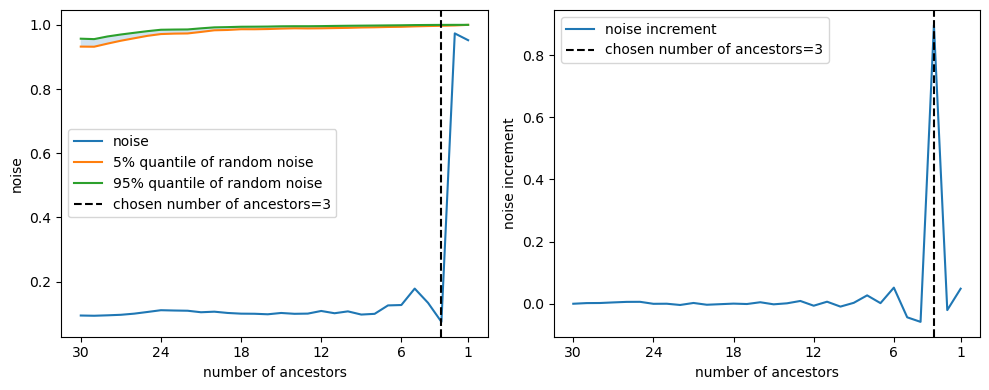

ancestors after pruning:  ['current_hospitalized_patients', 'new_recovered', 'cumulative_deceased'] 



inspecting current_hospitalized_patients
linear kernel (using gamma=3.72e-01)
 n/(n+s)=0.65, Z=0.99
quadratic kernel (using gamma=7.45e-02)
 n/(n+s)=0.47, Z=0.95
what about median ? 60603.46261414474
gaussian kernel (using gamma=5.03e+04)
 n/(n+s)=0.11, Z=0.72
current_hospitalized_patients has ancestors with quadratic kernel (n/(s+n)=0.47)
ancestors : ['new_hospitalized_patients', 'cumulative_hospitalized_patients', 'new_intensive_care_patients', 'cumulative_intensive_care_patients', 'current_intensive_care_patients', 'school_closing', 'workplace_closing', 'cancel_public_events', 'restrictions_on_gatherings', 'public_transport_closing', 'stay_at_home_requirements', 'income_support', 'facial_coverings', 'vaccination_policy', 'stringency_index', 'new_confirmed', 'new_deceased', 'new_recovered', 'new_tested', 'cumulative_confirmed', 'cumulative_deceased', 'cumulative_recovered', 'cumula

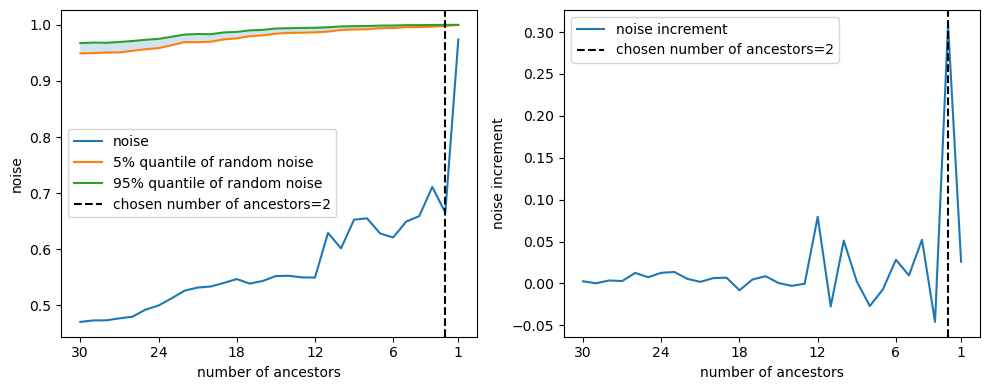

ancestors after pruning:  ['cumulative_hospitalized_patients', 'cumulative_tested'] 



inspecting new_intensive_care_patients
linear kernel (using gamma=4.48e+00)
 n/(n+s)=0.64, Z=0.99
quadratic kernel (using gamma=1.23e+00)
 n/(n+s)=0.60, Z=0.96
what about median ? 48556.19321001037
gaussian kernel (using gamma=3.81e+04)
 n/(n+s)=0.50, Z=0.74
new_intensive_care_patients has ancestors with quadratic kernel (n/(s+n)=0.60)
ancestors : ['new_hospitalized_patients', 'cumulative_hospitalized_patients', 'current_hospitalized_patients', 'cumulative_intensive_care_patients', 'current_intensive_care_patients', 'school_closing', 'workplace_closing', 'cancel_public_events', 'restrictions_on_gatherings', 'public_transport_closing', 'restrictions_on_internal_movement', 'income_support', 'facial_coverings', 'vaccination_policy', 'stringency_index', 'new_confirmed', 'new_deceased', 'new_recovered', 'new_tested', 'cumulative_confirmed', 'cumulative_deceased', 'cumulative_recovered', 'cumulative_teste

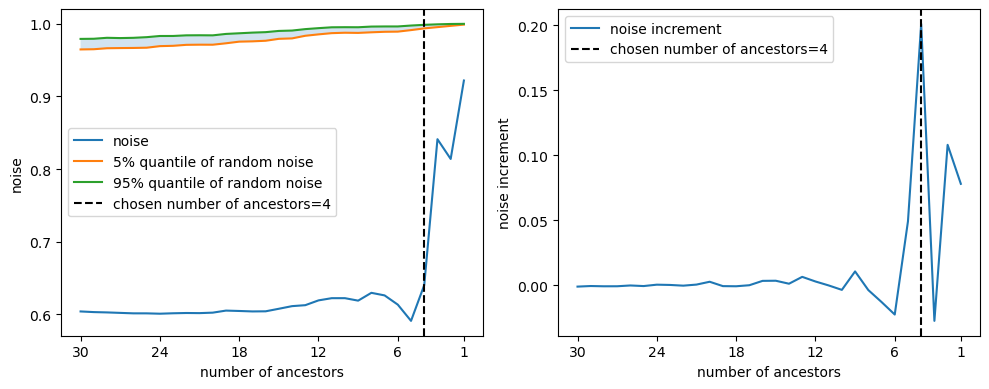

ancestors after pruning:  ['new_hospitalized_patients', 'current_hospitalized_patients', 'current_intensive_care_patients', 'new_deceased'] 



inspecting cumulative_intensive_care_patients
linear kernel (using gamma=1.56e-01)
 n/(n+s)=0.44, Z=0.99
quadratic kernel (using gamma=5.72e-03)
 n/(n+s)=0.12, Z=0.93
what about median ? 65370.76957927231
gaussian kernel (using gamma=5.56e+04)
 n/(n+s)=0.04, Z=0.72
cumulative_intensive_care_patients has ancestors with quadratic kernel (n/(s+n)=0.12)
ancestors : ['new_hospitalized_patients', 'cumulative_hospitalized_patients', 'current_hospitalized_patients', 'new_intensive_care_patients', 'current_intensive_care_patients', 'school_closing', 'workplace_closing', 'cancel_public_events', 'restrictions_on_gatherings', 'public_transport_closing', 'stay_at_home_requirements', 'restrictions_on_internal_movement', 'income_support', 'facial_coverings', 'vaccination_policy', 'stringency_index', 'new_confirmed', 'new_deceased', 'new_recovered', 'new_teste

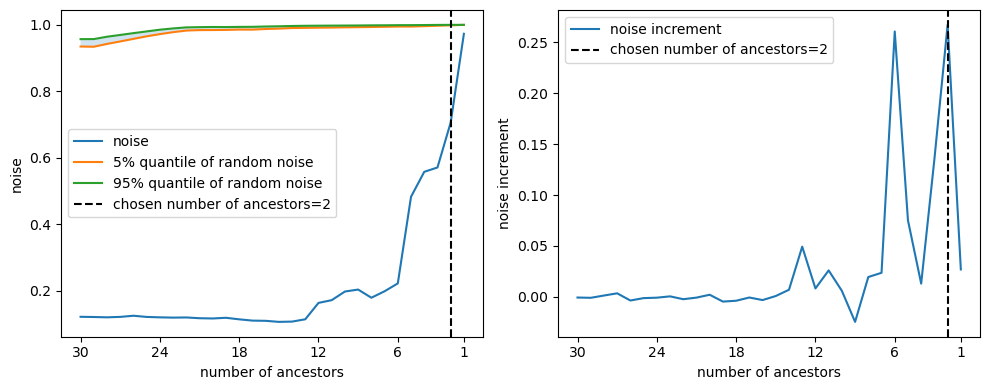

ancestors after pruning:  ['cumulative_hospitalized_patients', 'cumulative_tested'] 



inspecting current_intensive_care_patients
linear kernel (using gamma=2.19e+00)
 n/(n+s)=0.61, Z=0.99
quadratic kernel (using gamma=1.19e-01)
 n/(n+s)=0.40, Z=0.95
what about median ? 61012.38444547164
gaussian kernel (using gamma=5.05e+04)
 n/(n+s)=0.11, Z=0.72
current_intensive_care_patients has ancestors with quadratic kernel (n/(s+n)=0.40)
ancestors : ['new_hospitalized_patients', 'cumulative_hospitalized_patients', 'current_hospitalized_patients', 'new_intensive_care_patients', 'cumulative_intensive_care_patients', 'school_closing', 'workplace_closing', 'cancel_public_events', 'restrictions_on_gatherings', 'public_transport_closing', 'stay_at_home_requirements', 'restrictions_on_internal_movement', 'income_support', 'facial_coverings', 'vaccination_policy', 'stringency_index', 'new_confirmed', 'new_deceased', 'new_recovered', 'new_tested', 'cumulative_confirmed', 'cumulative_deceased', 'cumulat

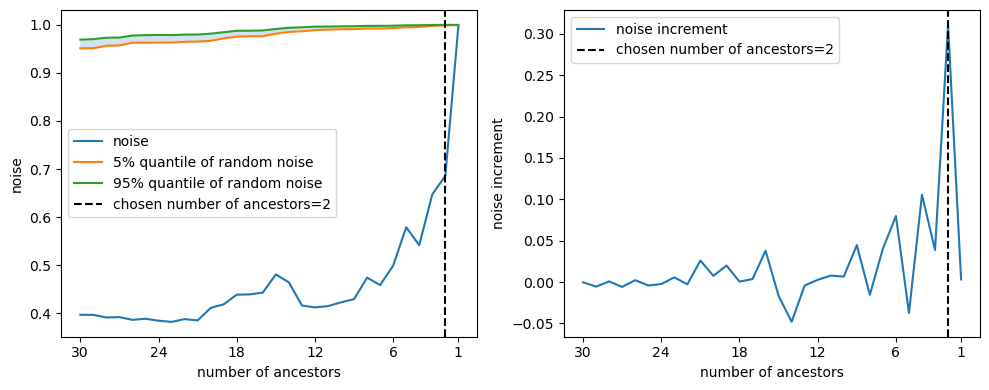

ancestors after pruning:  ['current_hospitalized_patients', 'cumulative_tested'] 



inspecting school_closing
linear kernel (using gamma=2.84e+00)
 n/(n+s)=0.66, Z=0.99
quadratic kernel (using gamma=1.19e-03)
 n/(n+s)=0.55, Z=0.93
what about median ? 65033.793558377896
gaussian kernel (using gamma=5.53e+04)
 n/(n+s)=0.14, Z=0.72
school_closing has ancestors with quadratic kernel (n/(s+n)=0.55)
ancestors : ['new_hospitalized_patients', 'cumulative_hospitalized_patients', 'current_hospitalized_patients', 'cumulative_intensive_care_patients', 'current_intensive_care_patients', 'workplace_closing', 'cancel_public_events', 'restrictions_on_gatherings', 'public_transport_closing', 'stay_at_home_requirements', 'restrictions_on_internal_movement', 'income_support', 'facial_coverings', 'vaccination_policy', 'stringency_index', 'new_confirmed', 'new_deceased', 'new_recovered', 'new_tested', 'cumulative_confirmed', 'cumulative_deceased', 'cumulative_recovered', 'cumulative_tested', 'new_persons_

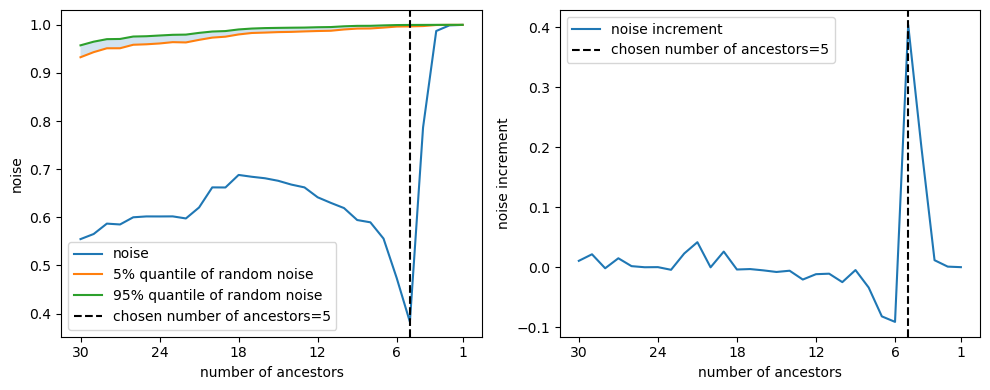

ancestors after pruning:  ['workplace_closing', 'stay_at_home_requirements', 'restrictions_on_internal_movement', 'vaccination_policy', 'stringency_index'] 



inspecting workplace_closing
linear kernel (using gamma=5.52e+00)
 n/(n+s)=0.74, Z=0.99
quadratic kernel (using gamma=1.34e-01)
 n/(n+s)=0.66, Z=0.95
what about median ? 64800.417376704034
gaussian kernel (using gamma=5.51e+04)
 n/(n+s)=0.28, Z=0.72
workplace_closing has ancestors with quadratic kernel (n/(s+n)=0.66)
ancestors : ['new_hospitalized_patients', 'cumulative_hospitalized_patients', 'current_hospitalized_patients', 'new_intensive_care_patients', 'cumulative_intensive_care_patients', 'current_intensive_care_patients', 'school_closing', 'cancel_public_events', 'restrictions_on_gatherings', 'public_transport_closing', 'stay_at_home_requirements', 'restrictions_on_internal_movement', 'income_support', 'facial_coverings', 'vaccination_policy', 'stringency_index', 'new_confirmed', 'new_deceased', 'new_recovered', 'new_teste

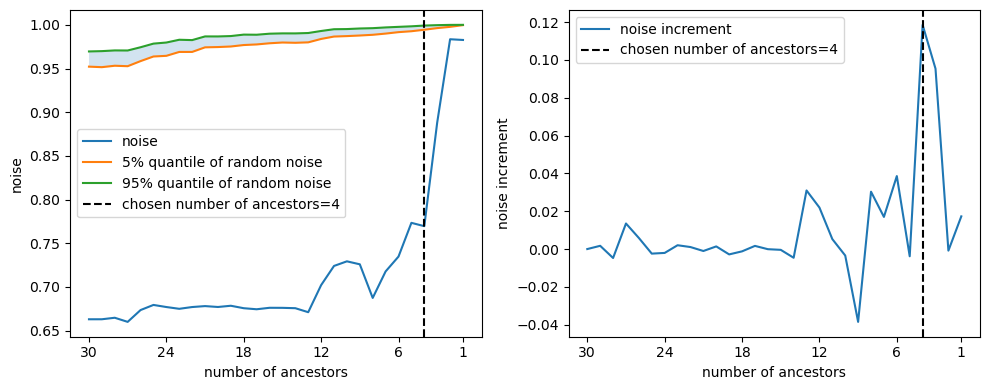

ancestors after pruning:  ['current_intensive_care_patients', 'restrictions_on_internal_movement', 'stringency_index', 'cumulative_persons_vaccinated'] 



inspecting cancel_public_events
linear kernel (using gamma=2.58e+00)
 n/(n+s)=0.69, Z=0.99
quadratic kernel (using gamma=2.69e-06)
 n/(n+s)=0.04, Z=0.93
what about median ? 65588.41104814524
gaussian kernel (using gamma=5.49e+04)
 n/(n+s)=0.08, Z=0.72
cancel_public_events has ancestors with quadratic kernel (n/(s+n)=0.04)
ancestors : ['new_hospitalized_patients', 'cumulative_hospitalized_patients', 'current_hospitalized_patients', 'new_intensive_care_patients', 'cumulative_intensive_care_patients', 'current_intensive_care_patients', 'school_closing', 'workplace_closing', 'restrictions_on_gatherings', 'public_transport_closing', 'stay_at_home_requirements', 'restrictions_on_internal_movement', 'income_support', 'facial_coverings', 'vaccination_policy', 'stringency_index', 'new_confirmed', 'new_deceased', 'new_recovered', 'new_tested'

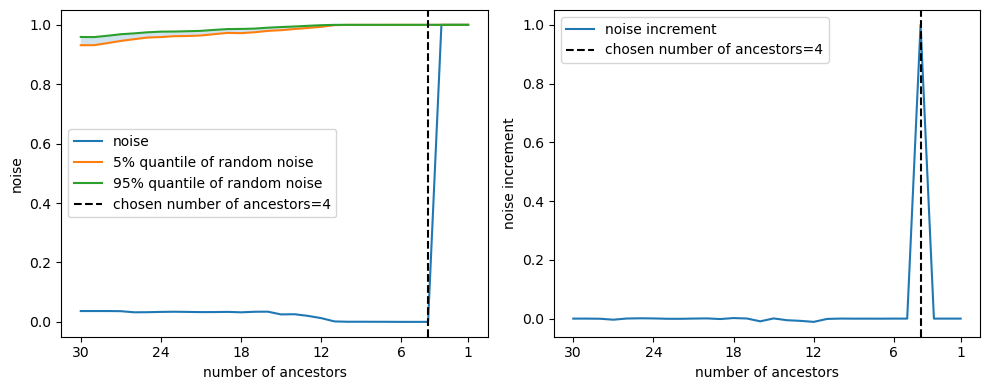

ancestors after pruning:  ['school_closing', 'workplace_closing', 'restrictions_on_gatherings', 'vaccination_policy'] 



inspecting restrictions_on_gatherings
linear kernel (using gamma=2.28e+00)
 n/(n+s)=0.75, Z=0.99
quadratic kernel (using gamma=2.46e-06)
 n/(n+s)=0.04, Z=0.93
what about median ? 64537.19876925093
gaussian kernel (using gamma=5.51e+04)
 n/(n+s)=0.12, Z=0.72
restrictions_on_gatherings has ancestors with quadratic kernel (n/(s+n)=0.04)
ancestors : ['cumulative_hospitalized_patients', 'current_hospitalized_patients', 'new_intensive_care_patients', 'cumulative_intensive_care_patients', 'current_intensive_care_patients', 'school_closing', 'workplace_closing', 'cancel_public_events', 'public_transport_closing', 'stay_at_home_requirements', 'restrictions_on_internal_movement', 'income_support', 'facial_coverings', 'vaccination_policy', 'stringency_index', 'new_confirmed', 'new_deceased', 'new_recovered', 'new_tested', 'cumulative_confirmed', 'cumulative_deceased', 'cumulat

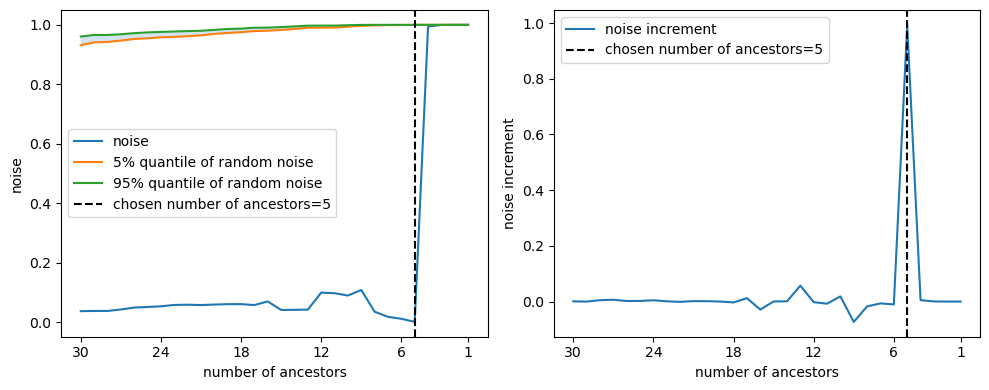

ancestors after pruning:  ['cancel_public_events', 'public_transport_closing', 'stay_at_home_requirements', 'income_support', 'stringency_index'] 



inspecting public_transport_closing
linear kernel (using gamma=1.24e+00)
 n/(n+s)=0.54, Z=0.99
quadratic kernel (using gamma=1.24e-06)
 n/(n+s)=0.06, Z=0.93
what about median ? 65590.28528825637
gaussian kernel (using gamma=5.59e+04)
 n/(n+s)=0.04, Z=0.72
public_transport_closing has ancestors with quadratic kernel (n/(s+n)=0.06)
ancestors : ['new_hospitalized_patients', 'cumulative_hospitalized_patients', 'current_hospitalized_patients', 'new_intensive_care_patients', 'cumulative_intensive_care_patients', 'current_intensive_care_patients', 'school_closing', 'workplace_closing', 'cancel_public_events', 'restrictions_on_gatherings', 'stay_at_home_requirements', 'restrictions_on_internal_movement', 'income_support', 'facial_coverings', 'vaccination_policy', 'stringency_index', 'new_confirmed', 'new_recovered', 'new_tested', 'cumulative_conf

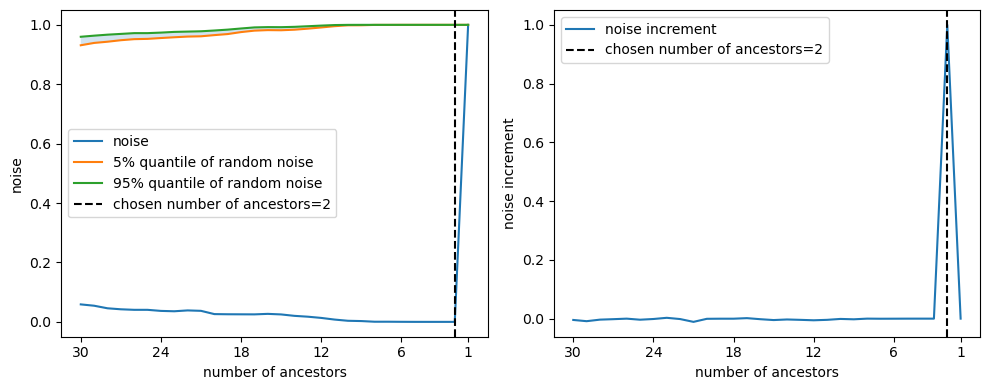

ancestors after pruning:  ['stay_at_home_requirements', 'restrictions_on_internal_movement'] 



inspecting stay_at_home_requirements
linear kernel (using gamma=2.23e+00)
 n/(n+s)=0.68, Z=0.99
quadratic kernel (using gamma=3.30e-06)
 n/(n+s)=0.02, Z=0.93
what about median ? 65560.12712420642
gaussian kernel (using gamma=5.55e+04)
 n/(n+s)=0.11, Z=0.72
stay_at_home_requirements has ancestors with quadratic kernel (n/(s+n)=0.02)
ancestors : ['new_hospitalized_patients', 'cumulative_hospitalized_patients', 'current_hospitalized_patients', 'new_intensive_care_patients', 'cumulative_intensive_care_patients', 'current_intensive_care_patients', 'school_closing', 'workplace_closing', 'cancel_public_events', 'restrictions_on_gatherings', 'public_transport_closing', 'restrictions_on_internal_movement', 'income_support', 'facial_coverings', 'vaccination_policy', 'stringency_index', 'new_confirmed', 'new_deceased', 'new_recovered', 'new_tested', 'cumulative_confirmed', 'cumulative_deceased', 'cumu

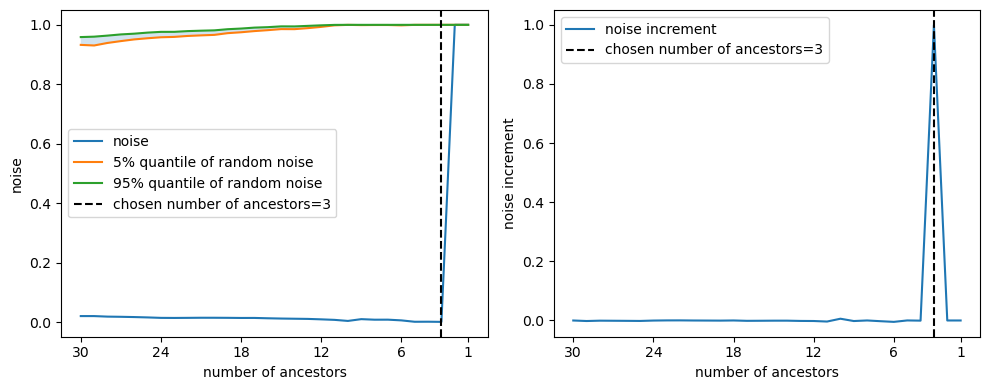

ancestors after pruning:  ['cancel_public_events', 'restrictions_on_gatherings', 'stringency_index'] 



inspecting restrictions_on_internal_movement
linear kernel (using gamma=2.68e+00)
 n/(n+s)=0.73, Z=0.99
quadratic kernel (using gamma=4.13e-03)
 n/(n+s)=0.49, Z=0.94
what about median ? 64179.28764533051
gaussian kernel (using gamma=5.54e+04)
 n/(n+s)=0.09, Z=0.72
restrictions_on_internal_movement has ancestors with quadratic kernel (n/(s+n)=0.49)
ancestors : ['new_hospitalized_patients', 'cumulative_hospitalized_patients', 'current_hospitalized_patients', 'new_intensive_care_patients', 'cumulative_intensive_care_patients', 'current_intensive_care_patients', 'school_closing', 'workplace_closing', 'cancel_public_events', 'restrictions_on_gatherings', 'public_transport_closing', 'stay_at_home_requirements', 'income_support', 'facial_coverings', 'vaccination_policy', 'stringency_index', 'new_confirmed', 'new_deceased', 'new_recovered', 'new_tested', 'cumulative_confirmed', 'cumulative_

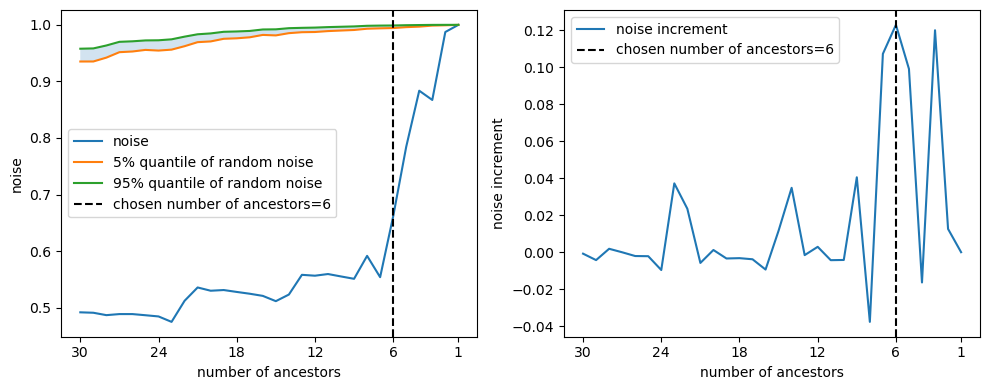

ancestors after pruning:  ['current_intensive_care_patients', 'workplace_closing', 'stay_at_home_requirements', 'vaccination_policy', 'stringency_index', 'cumulative_persons_fully_vaccinated'] 



inspecting income_support
linear kernel (using gamma=2.42e+00)
 n/(n+s)=0.81, Z=0.99
quadratic kernel (using gamma=4.87e-06)
 n/(n+s)=0.04, Z=0.93
what about median ? 62533.14369948406
gaussian kernel (using gamma=5.47e+04)
 n/(n+s)=0.24, Z=0.72
income_support has ancestors with quadratic kernel (n/(s+n)=0.04)
ancestors : ['new_hospitalized_patients', 'cumulative_hospitalized_patients', 'current_hospitalized_patients', 'cumulative_intensive_care_patients', 'current_intensive_care_patients', 'school_closing', 'workplace_closing', 'cancel_public_events', 'restrictions_on_gatherings', 'public_transport_closing', 'stay_at_home_requirements', 'restrictions_on_internal_movement', 'facial_coverings', 'vaccination_policy', 'stringency_index', 'new_confirmed', 'new_deceased', 'new_recovered', 'new_tes

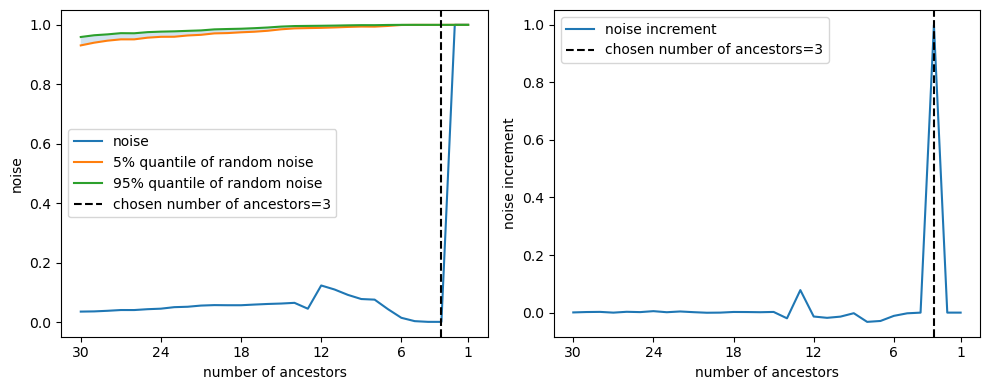

ancestors after pruning:  ['restrictions_on_gatherings', 'public_transport_closing', 'stringency_index'] 



inspecting facial_coverings
linear kernel (using gamma=5.95e+00)
 n/(n+s)=0.82, Z=0.99
quadratic kernel (using gamma=1.56e+00)
 n/(n+s)=0.78, Z=0.97
what about median ? 59919.788503872376
gaussian kernel (using gamma=4.75e+04)
 n/(n+s)=0.60, Z=0.72
facial_coverings has ancestors with quadratic kernel (n/(s+n)=0.78)
ancestors : ['new_hospitalized_patients', 'cumulative_hospitalized_patients', 'current_hospitalized_patients', 'new_intensive_care_patients', 'cumulative_intensive_care_patients', 'current_intensive_care_patients', 'workplace_closing', 'cancel_public_events', 'restrictions_on_gatherings', 'public_transport_closing', 'stay_at_home_requirements', 'restrictions_on_internal_movement', 'income_support', 'vaccination_policy', 'stringency_index', 'new_confirmed', 'new_deceased', 'new_recovered', 'new_tested', 'cumulative_confirmed', 'cumulative_deceased', 'cumulative_recover

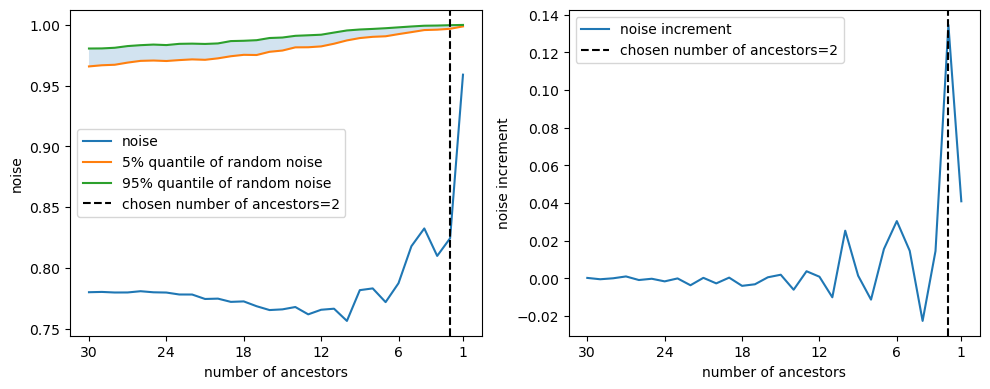

ancestors after pruning:  ['current_intensive_care_patients', 'cumulative_tested'] 



inspecting vaccination_policy
linear kernel (using gamma=4.09e+00)
 n/(n+s)=0.70, Z=0.99
quadratic kernel (using gamma=5.25e-01)
 n/(n+s)=0.77, Z=0.96
what about median ? 62279.737542737654
gaussian kernel (using gamma=5.51e+04)
 n/(n+s)=0.30, Z=0.72
vaccination_policy has ancestors with quadratic kernel (n/(s+n)=0.77)
ancestors : ['new_hospitalized_patients', 'cumulative_hospitalized_patients', 'current_hospitalized_patients', 'new_intensive_care_patients', 'cumulative_intensive_care_patients', 'current_intensive_care_patients', 'school_closing', 'workplace_closing', 'cancel_public_events', 'public_transport_closing', 'stay_at_home_requirements', 'restrictions_on_internal_movement', 'income_support', 'facial_coverings', 'stringency_index', 'new_confirmed', 'new_deceased', 'new_recovered', 'new_tested', 'cumulative_confirmed', 'cumulative_deceased', 'cumulative_recovered', 'cumulative_tested', 'new_p

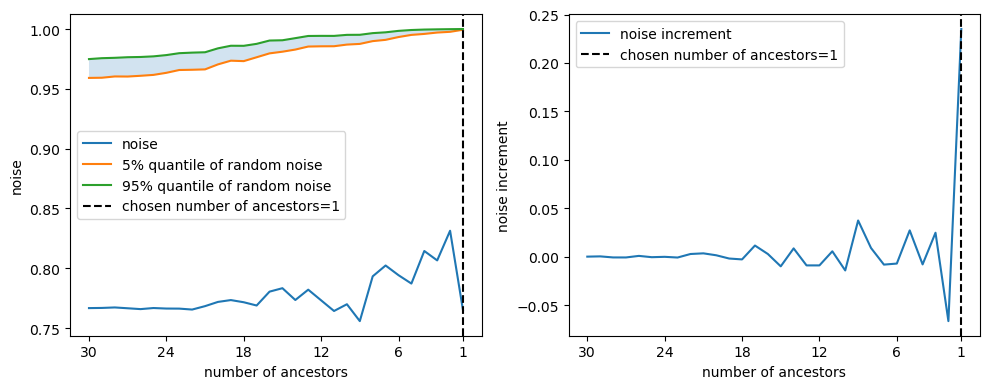

ancestors after pruning:  ['cumulative_intensive_care_patients'] 



inspecting stringency_index
linear kernel (using gamma=6.70e-01)
 n/(n+s)=0.20, Z=0.99
quadratic kernel (using gamma=3.71e-02)
 n/(n+s)=0.30, Z=0.94
what about median ? 65542.34234545166
gaussian kernel (using gamma=5.57e+04)
 n/(n+s)=0.06, Z=0.72
stringency_index has ancestors with quadratic kernel (n/(s+n)=0.30)
ancestors : ['new_hospitalized_patients', 'cumulative_hospitalized_patients', 'current_hospitalized_patients', 'new_intensive_care_patients', 'cumulative_intensive_care_patients', 'current_intensive_care_patients', 'school_closing', 'workplace_closing', 'cancel_public_events', 'restrictions_on_gatherings', 'public_transport_closing', 'stay_at_home_requirements', 'restrictions_on_internal_movement', 'income_support', 'facial_coverings', 'vaccination_policy', 'new_confirmed', 'new_deceased', 'new_recovered', 'new_tested', 'cumulative_confirmed', 'cumulative_deceased', 'cumulative_recovered', 'cumulative_tested

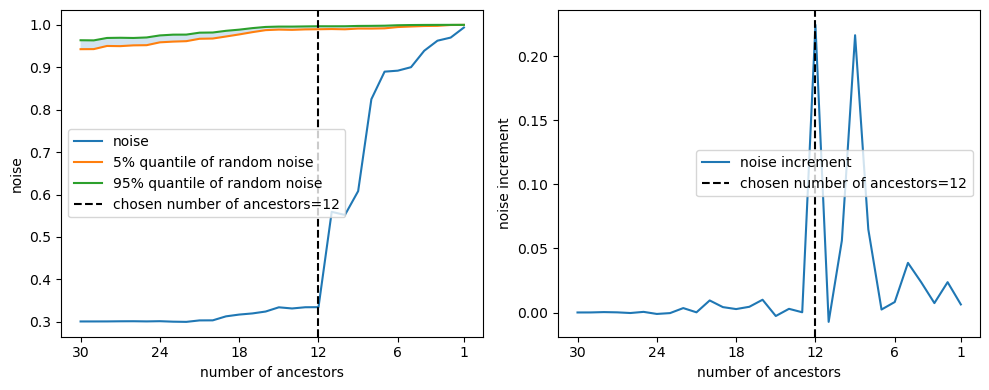

ancestors after pruning:  ['current_hospitalized_patients', 'current_intensive_care_patients', 'school_closing', 'workplace_closing', 'cancel_public_events', 'restrictions_on_gatherings', 'public_transport_closing', 'stay_at_home_requirements', 'restrictions_on_internal_movement', 'income_support', 'vaccination_policy', 'cumulative_persons_fully_vaccinated'] 



inspecting new_confirmed
linear kernel (using gamma=9.18e+00)
 n/(n+s)=0.82, Z=0.99
quadratic kernel (using gamma=2.27e+00)
 n/(n+s)=0.75, Z=0.97
what about median ? 50104.74460127177
gaussian kernel (using gamma=4.15e+04)
 n/(n+s)=0.40, Z=0.73
new_confirmed has ancestors with quadratic kernel (n/(s+n)=0.75)
ancestors : ['new_hospitalized_patients', 'cumulative_hospitalized_patients', 'current_hospitalized_patients', 'new_intensive_care_patients', 'cumulative_intensive_care_patients', 'current_intensive_care_patients', 'school_closing', 'workplace_closing', 'cancel_public_events', 'restrictions_on_gatherings', 'public_transport

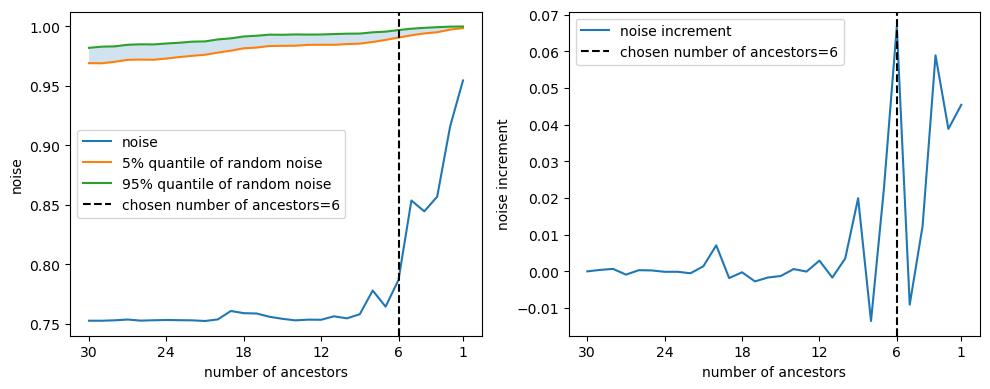

ancestors after pruning:  ['new_hospitalized_patients', 'current_intensive_care_patients', 'restrictions_on_gatherings', 'public_transport_closing', 'new_deceased', 'cumulative_tested'] 



inspecting new_deceased
linear kernel (using gamma=8.97e+00)
 n/(n+s)=0.79, Z=0.99
quadratic kernel (using gamma=1.74e+00)
 n/(n+s)=0.87, Z=0.97
what about median ? 44432.63579941211
gaussian kernel (using gamma=3.61e+04)
 n/(n+s)=0.56, Z=0.74
new_deceased has ancestors with quadratic kernel (n/(s+n)=0.87)
ancestors : ['new_hospitalized_patients', 'cumulative_hospitalized_patients', 'current_hospitalized_patients', 'new_intensive_care_patients', 'cumulative_intensive_care_patients', 'current_intensive_care_patients', 'school_closing', 'workplace_closing', 'cancel_public_events', 'restrictions_on_gatherings', 'public_transport_closing', 'stay_at_home_requirements', 'restrictions_on_internal_movement', 'facial_coverings', 'vaccination_policy', 'stringency_index', 'new_confirmed', 'new_recovered', 'new

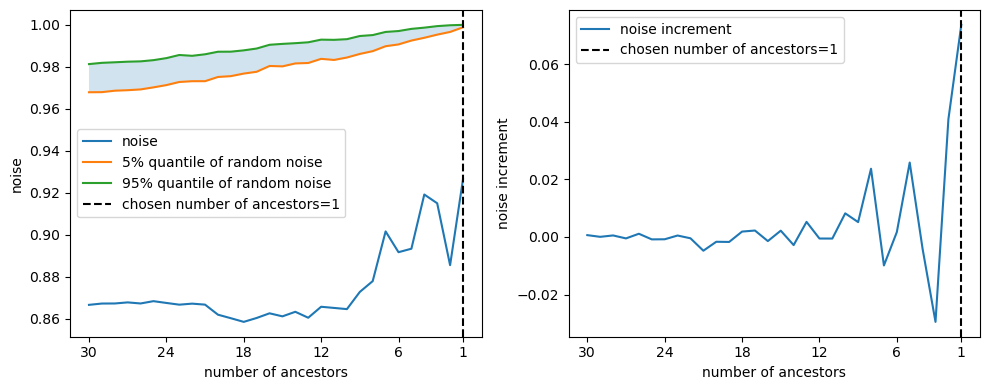

ancestors after pruning:  ['new_hospitalized_patients'] 



inspecting new_recovered
linear kernel (using gamma=2.26e-02)
 n/(n+s)=0.21, Z=0.99
quadratic kernel (using gamma=4.36e-03)
 n/(n+s)=0.10, Z=0.93
what about median ? 65382.23680556133
gaussian kernel (using gamma=5.53e+04)
 n/(n+s)=0.05, Z=0.72
new_recovered has ancestors with quadratic kernel (n/(s+n)=0.10)
ancestors : ['new_hospitalized_patients', 'cumulative_hospitalized_patients', 'current_hospitalized_patients', 'new_intensive_care_patients', 'cumulative_intensive_care_patients', 'current_intensive_care_patients', 'school_closing', 'workplace_closing', 'cancel_public_events', 'restrictions_on_gatherings', 'public_transport_closing', 'stay_at_home_requirements', 'restrictions_on_internal_movement', 'income_support', 'facial_coverings', 'vaccination_policy', 'stringency_index', 'new_confirmed', 'new_deceased', 'new_tested', 'cumulative_confirmed', 'cumulative_deceased', 'cumulative_recovered', 'cumulative_tested', 'new_pers

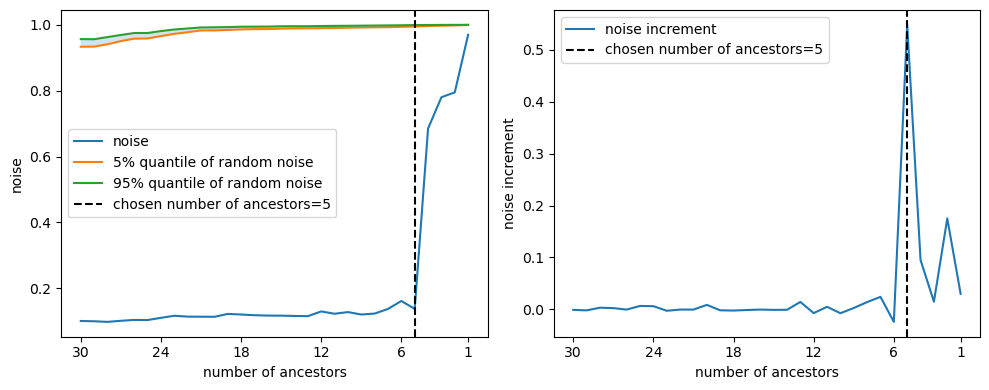

ancestors after pruning:  ['cumulative_hospitalized_patients', 'current_hospitalized_patients', 'cumulative_intensive_care_patients', 'cumulative_deceased', 'cumulative_tested'] 



inspecting new_tested
linear kernel (using gamma=8.86e+00)
 n/(n+s)=0.74, Z=0.99
quadratic kernel (using gamma=1.92e+00)
 n/(n+s)=0.74, Z=0.97
what about median ? 45609.05085243989
gaussian kernel (using gamma=3.61e+04)
 n/(n+s)=0.55, Z=0.74
new_tested has ancestors with quadratic kernel (n/(s+n)=0.74)
ancestors : ['new_hospitalized_patients', 'cumulative_hospitalized_patients', 'current_hospitalized_patients', 'new_intensive_care_patients', 'cumulative_intensive_care_patients', 'current_intensive_care_patients', 'school_closing', 'workplace_closing', 'cancel_public_events', 'restrictions_on_gatherings', 'public_transport_closing', 'stay_at_home_requirements', 'restrictions_on_internal_movement', 'income_support', 'facial_coverings', 'vaccination_policy', 'stringency_index', 'new_confirmed', 'new_deceased',

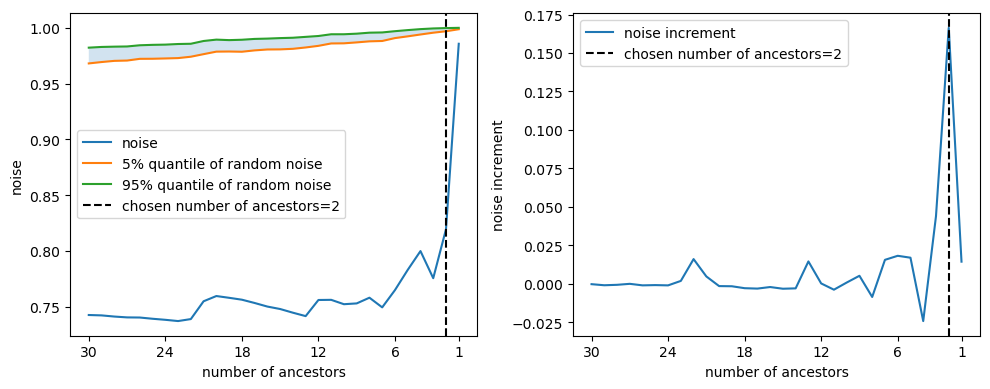

ancestors after pruning:  ['new_hospitalized_patients', 'current_hospitalized_patients'] 



inspecting cumulative_confirmed
linear kernel (using gamma=2.09e+00)
 n/(n+s)=0.65, Z=0.99
quadratic kernel (using gamma=3.02e-02)
 n/(n+s)=0.39, Z=0.94
what about median ? 59853.45844815609
gaussian kernel (using gamma=5.16e+04)
 n/(n+s)=0.14, Z=0.72
cumulative_confirmed has ancestors with quadratic kernel (n/(s+n)=0.39)
ancestors : ['new_hospitalized_patients', 'cumulative_hospitalized_patients', 'current_hospitalized_patients', 'new_intensive_care_patients', 'cumulative_intensive_care_patients', 'current_intensive_care_patients', 'school_closing', 'workplace_closing', 'cancel_public_events', 'restrictions_on_gatherings', 'public_transport_closing', 'stay_at_home_requirements', 'restrictions_on_internal_movement', 'income_support', 'facial_coverings', 'vaccination_policy', 'stringency_index', 'new_deceased', 'new_recovered', 'new_tested', 'cumulative_deceased', 'cumulative_recovered', 'cumula

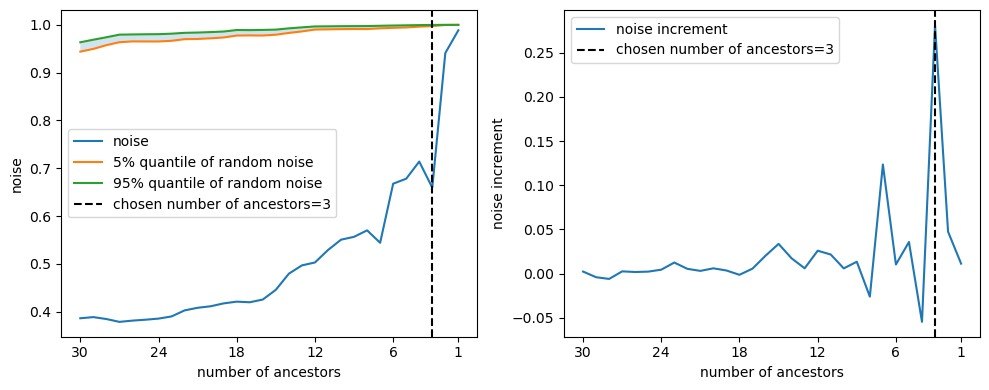

ancestors after pruning:  ['cumulative_hospitalized_patients', 'current_intensive_care_patients', 'cumulative_deceased'] 



inspecting cumulative_deceased
linear kernel (using gamma=1.64e+00)
 n/(n+s)=0.57, Z=0.99
quadratic kernel (using gamma=2.53e-01)
 n/(n+s)=0.72, Z=0.95
what about median ? 64906.84519922482
gaussian kernel (using gamma=5.55e+04)
 n/(n+s)=0.11, Z=0.72
cumulative_deceased has ancestors with quadratic kernel (n/(s+n)=0.72)
ancestors : ['new_hospitalized_patients', 'cumulative_hospitalized_patients', 'current_hospitalized_patients', 'new_intensive_care_patients', 'cumulative_intensive_care_patients', 'current_intensive_care_patients', 'school_closing', 'workplace_closing', 'cancel_public_events', 'restrictions_on_gatherings', 'public_transport_closing', 'stay_at_home_requirements', 'restrictions_on_internal_movement', 'income_support', 'facial_coverings', 'vaccination_policy', 'stringency_index', 'new_deceased', 'new_recovered', 'new_tested', 'cumulative_confirmed', 

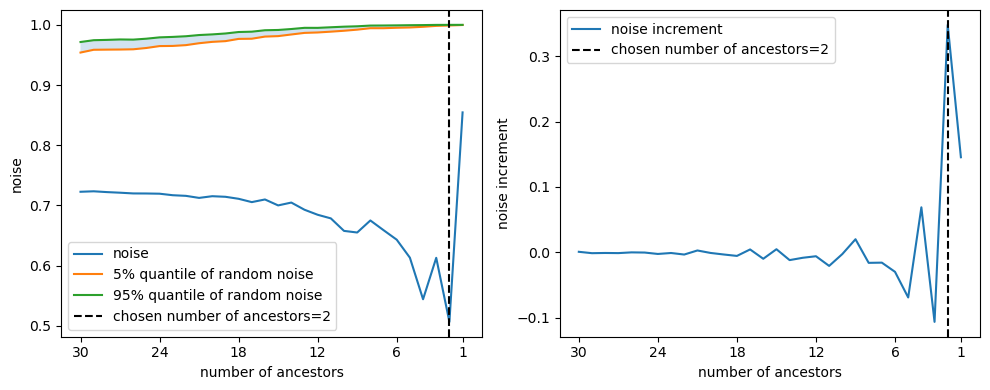

ancestors after pruning:  ['new_recovered', 'cumulative_confirmed'] 



inspecting cumulative_recovered
linear kernel (using gamma=6.53e-01)
 n/(n+s)=0.59, Z=0.99
quadratic kernel (using gamma=2.02e-02)
 n/(n+s)=0.37, Z=0.94
what about median ? 65537.66308278224
gaussian kernel (using gamma=5.48e+04)
 n/(n+s)=0.05, Z=0.72
cumulative_recovered has ancestors with quadratic kernel (n/(s+n)=0.37)
ancestors : ['new_hospitalized_patients', 'cumulative_hospitalized_patients', 'current_hospitalized_patients', 'new_intensive_care_patients', 'cumulative_intensive_care_patients', 'current_intensive_care_patients', 'school_closing', 'workplace_closing', 'cancel_public_events', 'restrictions_on_gatherings', 'public_transport_closing', 'stay_at_home_requirements', 'restrictions_on_internal_movement', 'income_support', 'facial_coverings', 'vaccination_policy', 'stringency_index', 'new_confirmed', 'new_deceased', 'new_recovered', 'new_tested', 'cumulative_deceased', 'cumulative_tested', 'new_persons_v

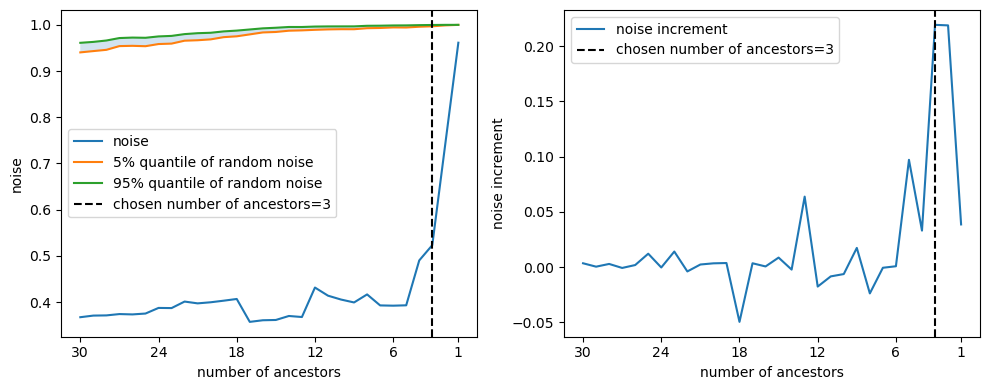

ancestors after pruning:  ['income_support', 'new_recovered', 'cumulative_tested'] 



inspecting cumulative_tested
linear kernel (using gamma=5.19e-01)
 n/(n+s)=0.41, Z=0.99
quadratic kernel (using gamma=1.20e-02)
 n/(n+s)=0.20, Z=0.94
what about median ? 65533.86189138665
gaussian kernel (using gamma=5.55e+04)
 n/(n+s)=0.04, Z=0.72
cumulative_tested has ancestors with quadratic kernel (n/(s+n)=0.20)
ancestors : ['new_hospitalized_patients', 'cumulative_hospitalized_patients', 'current_hospitalized_patients', 'new_intensive_care_patients', 'cumulative_intensive_care_patients', 'current_intensive_care_patients', 'school_closing', 'workplace_closing', 'cancel_public_events', 'restrictions_on_gatherings', 'public_transport_closing', 'stay_at_home_requirements', 'restrictions_on_internal_movement', 'income_support', 'facial_coverings', 'vaccination_policy', 'stringency_index', 'new_confirmed', 'new_recovered', 'new_tested', 'cumulative_confirmed', 'cumulative_deceased', 'cumulative_recove

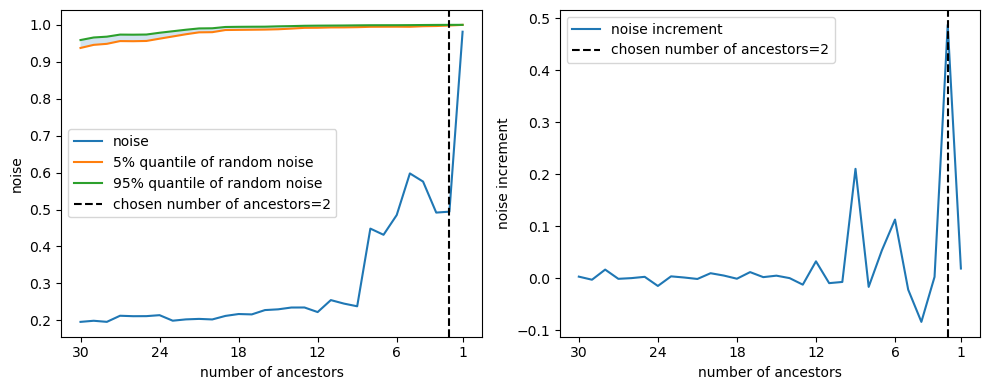

ancestors after pruning:  ['cumulative_intensive_care_patients', 'cumulative_vaccine_doses_administered'] 



inspecting new_persons_vaccinated
gamma too small for set tolerance(2.24e-13), using 1.00e-09 instead
This can either mean that the noise is very low or there is an issue in the automatic determination of gamma. To change the tolerance, change parameter gamma_min
linear kernel (using gamma=1.00e-09)
 n/(n+s)=0.00, Z=1.00
quadratic kernel (using gamma=2.43e-08)
 n/(n+s)=0.00, Z=0.91
what about median ? 56361.95658862414
gaussian kernel (using gamma=4.90e+04)
 n/(n+s)=0.17, Z=0.73
new_persons_vaccinated has ancestors with quadratic kernel (n/(s+n)=0.00)
ancestors : ['new_hospitalized_patients', 'cumulative_hospitalized_patients', 'current_hospitalized_patients', 'cumulative_intensive_care_patients', 'current_intensive_care_patients', 'school_closing', 'workplace_closing', 'cancel_public_events', 'restrictions_on_gatherings', 'public_transport_closing', 'stay_at_home_requirements'

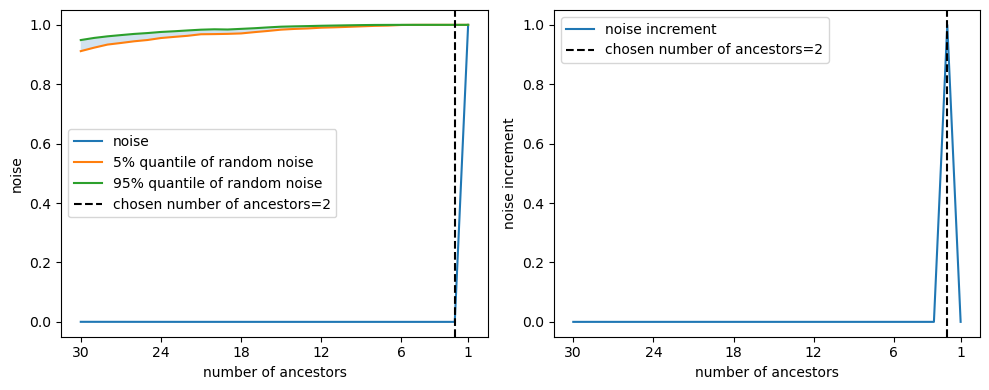

ancestors after pruning:  ['new_persons_fully_vaccinated', 'new_vaccine_doses_administered'] 



inspecting cumulative_persons_vaccinated
gamma too small for set tolerance(8.09e-12), using 1.00e-09 instead
This can either mean that the noise is very low or there is an issue in the automatic determination of gamma. To change the tolerance, change parameter gamma_min
linear kernel (using gamma=1.00e-09)
 n/(n+s)=0.00, Z=1.00
quadratic kernel (using gamma=2.30e-06)
 n/(n+s)=0.19, Z=0.93
what about median ? 65579.33749433808
gaussian kernel (using gamma=5.58e+04)
 n/(n+s)=0.04, Z=0.72
cumulative_persons_vaccinated has ancestors with quadratic kernel (n/(s+n)=0.19)
ancestors : ['new_hospitalized_patients', 'cumulative_hospitalized_patients', 'current_hospitalized_patients', 'new_intensive_care_patients', 'cumulative_intensive_care_patients', 'current_intensive_care_patients', 'school_closing', 'workplace_closing', 'cancel_public_events', 'restrictions_on_gatherings', 'public_transport_closi

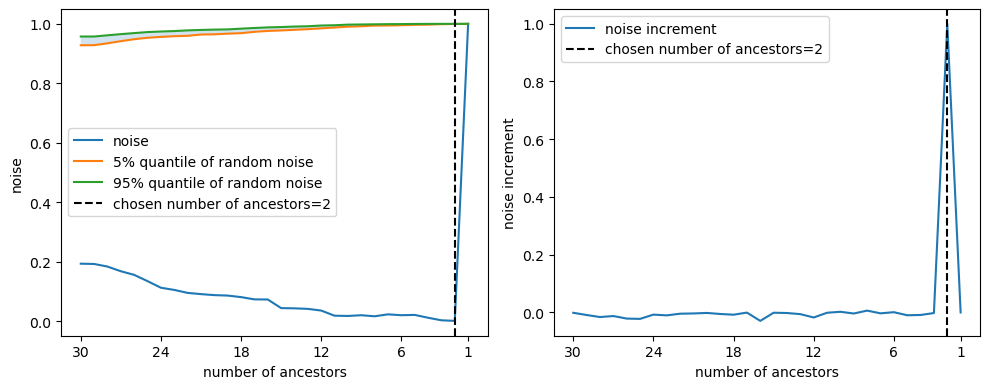

ancestors after pruning:  ['cumulative_persons_fully_vaccinated', 'cumulative_vaccine_doses_administered'] 



inspecting new_persons_fully_vaccinated
gamma too small for set tolerance(1.81e-13), using 1.00e-09 instead
This can either mean that the noise is very low or there is an issue in the automatic determination of gamma. To change the tolerance, change parameter gamma_min
linear kernel (using gamma=1.00e-09)
 n/(n+s)=0.00, Z=1.00
quadratic kernel (using gamma=1.77e-08)
 n/(n+s)=0.00, Z=0.91
what about median ? 55909.78527540117
gaussian kernel (using gamma=4.95e+04)
 n/(n+s)=0.17, Z=0.73
new_persons_fully_vaccinated has ancestors with quadratic kernel (n/(s+n)=0.00)
ancestors : ['new_hospitalized_patients', 'cumulative_hospitalized_patients', 'current_hospitalized_patients', 'cumulative_intensive_care_patients', 'current_intensive_care_patients', 'school_closing', 'workplace_closing', 'cancel_public_events', 'restrictions_on_gatherings', 'public_transport_closing', 'stay_at_home_

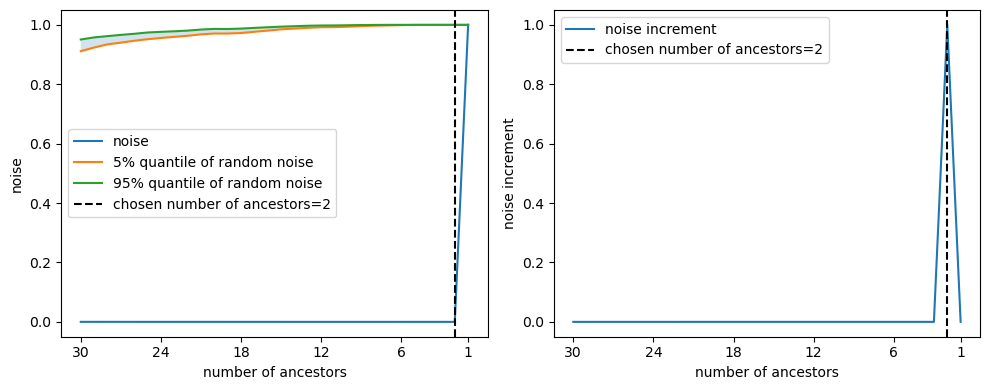

ancestors after pruning:  ['new_persons_vaccinated', 'new_vaccine_doses_administered'] 



inspecting cumulative_persons_fully_vaccinated
gamma too small for set tolerance(1.34e-11), using 1.00e-09 instead
This can either mean that the noise is very low or there is an issue in the automatic determination of gamma. To change the tolerance, change parameter gamma_min
linear kernel (using gamma=1.00e-09)
 n/(n+s)=0.00, Z=1.00
quadratic kernel (using gamma=4.06e-06)
 n/(n+s)=0.20, Z=0.93
what about median ? 65586.9558850793
gaussian kernel (using gamma=5.57e+04)
 n/(n+s)=0.04, Z=0.72
cumulative_persons_fully_vaccinated has ancestors with quadratic kernel (n/(s+n)=0.20)
ancestors : ['new_hospitalized_patients', 'cumulative_hospitalized_patients', 'current_hospitalized_patients', 'new_intensive_care_patients', 'cumulative_intensive_care_patients', 'current_intensive_care_patients', 'school_closing', 'workplace_closing', 'cancel_public_events', 'restrictions_on_gatherings', 'public_transport_

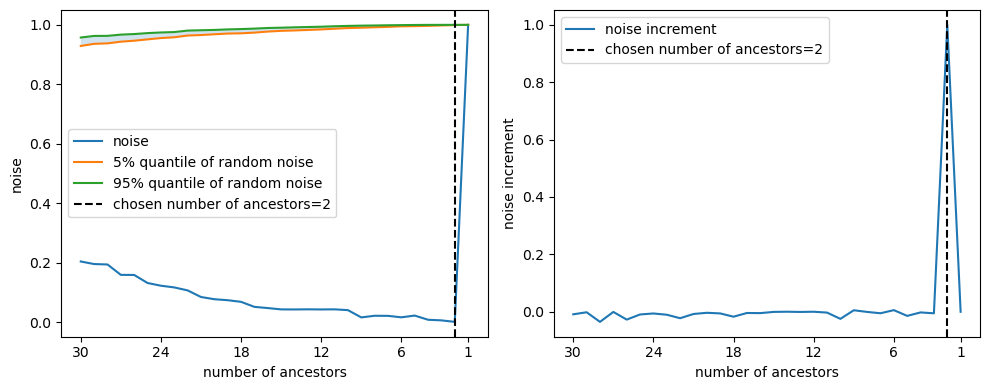

ancestors after pruning:  ['cumulative_persons_vaccinated', 'cumulative_vaccine_doses_administered'] 



inspecting new_vaccine_doses_administered
gamma too small for set tolerance(3.39e-14), using 1.00e-09 instead
This can either mean that the noise is very low or there is an issue in the automatic determination of gamma. To change the tolerance, change parameter gamma_min
linear kernel (using gamma=1.00e-09)
 n/(n+s)=0.00, Z=1.00
quadratic kernel (using gamma=2.20e-09)
 n/(n+s)=0.00, Z=0.92
what about median ? 61075.00797405522
gaussian kernel (using gamma=5.25e+04)
 n/(n+s)=0.08, Z=0.73
new_vaccine_doses_administered has ancestors with quadratic kernel (n/(s+n)=0.00)
ancestors : ['new_hospitalized_patients', 'cumulative_hospitalized_patients', 'current_hospitalized_patients', 'new_intensive_care_patients', 'cumulative_intensive_care_patients', 'current_intensive_care_patients', 'school_closing', 'workplace_closing', 'cancel_public_events', 'restrictions_on_gatherings', 'public_trans

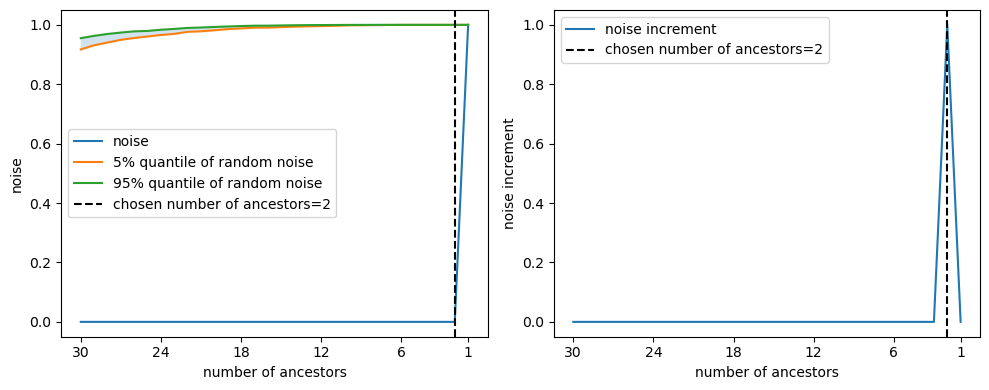

ancestors after pruning:  ['new_persons_vaccinated', 'new_persons_fully_vaccinated'] 



inspecting cumulative_vaccine_doses_administered
gamma too small for set tolerance(2.36e-13), using 1.00e-09 instead
This can either mean that the noise is very low or there is an issue in the automatic determination of gamma. To change the tolerance, change parameter gamma_min
linear kernel (using gamma=1.00e-09)
 n/(n+s)=0.00, Z=1.00
quadratic kernel (using gamma=2.75e-07)
 n/(n+s)=0.02, Z=0.92
what about median ? 65584.64831797128
gaussian kernel (using gamma=5.58e+04)
 n/(n+s)=0.04, Z=0.72
cumulative_vaccine_doses_administered has ancestors with quadratic kernel (n/(s+n)=0.02)
ancestors : ['new_hospitalized_patients', 'cumulative_hospitalized_patients', 'current_hospitalized_patients', 'new_intensive_care_patients', 'cumulative_intensive_care_patients', 'current_intensive_care_patients', 'school_closing', 'workplace_closing', 'cancel_public_events', 'restrictions_on_gatherings', 'public_transpo

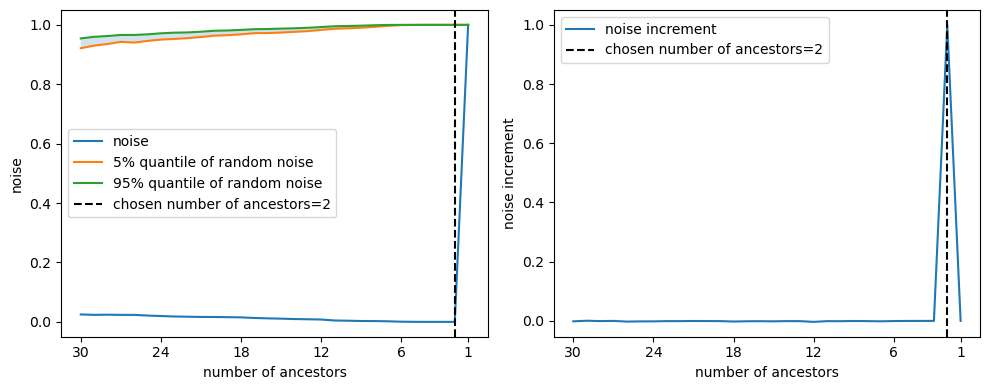

ancestors after pruning:  ['cumulative_persons_vaccinated', 'cumulative_persons_fully_vaccinated'] 





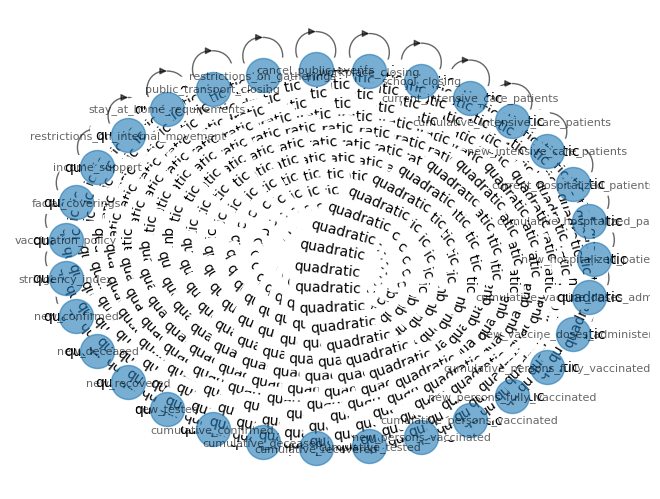

In [61]:
for node in graph_discovery.names:
    print(f'inspecting {node}')
    graph_discovery.find_ancestors(
        node,
        gamma='auto',
        kernel_chooser={'custom':(lambda *args:'quadratic')},
    )
    print('\n')
graph_discovery.plot_graph()

In [62]:
import pickle

# save graph object to file
try:
    pickle.dump(graph_discovery.G, open('full_covid_graph.pickle', 'wb'))
except:
    pass
with open('full_covid_graph.pickle', 'rb') as f:  # notice the r instead of w
    G_loaded = pickle.load(f)

In [63]:
G_loaded.edges

OutEdgeView([('new_hospitalized_patients', 'new_hospitalized_patients'), ('new_hospitalized_patients', 'cancel_public_events'), ('new_hospitalized_patients', 'cumulative_hospitalized_patients'), ('new_hospitalized_patients', 'current_hospitalized_patients'), ('new_hospitalized_patients', 'new_intensive_care_patients'), ('new_hospitalized_patients', 'cumulative_intensive_care_patients'), ('new_hospitalized_patients', 'current_intensive_care_patients'), ('new_hospitalized_patients', 'school_closing'), ('new_hospitalized_patients', 'workplace_closing'), ('new_hospitalized_patients', 'restrictions_on_gatherings'), ('new_hospitalized_patients', 'public_transport_closing'), ('new_hospitalized_patients', 'stay_at_home_requirements'), ('new_hospitalized_patients', 'restrictions_on_internal_movement'), ('new_hospitalized_patients', 'income_support'), ('new_hospitalized_patients', 'facial_coverings'), ('new_hospitalized_patients', 'vaccination_policy'), ('new_hospitalized_patients', 'stringency_

In [64]:
def plot_a_network(G,type_label=True):
    pos=nx.kamada_kawai_layout(G, G.nodes())
    nx.draw(G, with_labels=True, pos=pos, node_size=600, font_size=8, alpha=0.6)
    if type_label:
        nx.draw_networkx_edge_labels(G,pos,edge_labels=nx.get_edge_attributes(G,'type'))
    x_values, y_values = zip(*pos.values())
    x_max = max(x_values)
    x_min = min(x_values)
    x_margin = (x_max - x_min) * 0.25
    plt.xlim(x_min - x_margin, x_max + x_margin)

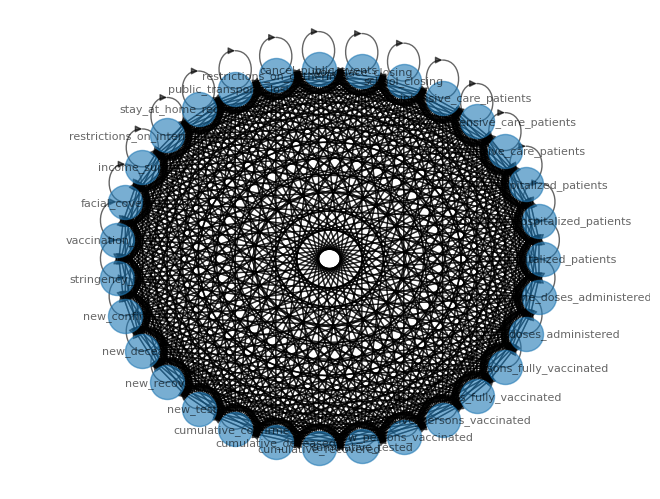

In [65]:
plot_a_network(G_loaded,False)

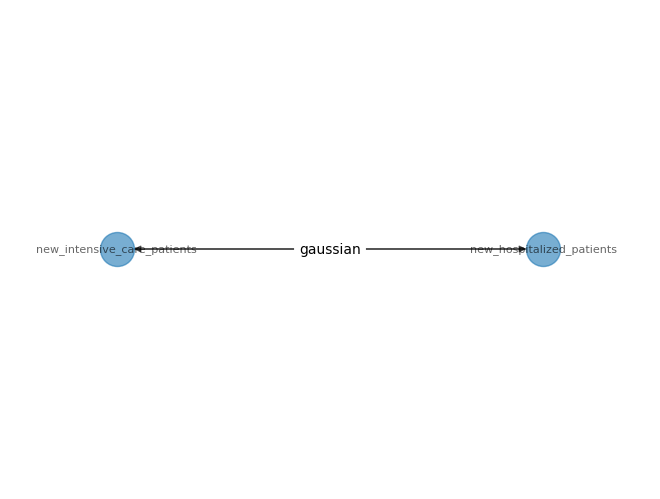

In [10]:
plot_a_network(nx.ego_graph(G_loaded.reverse(),'new_intensive_care_patients',undirected=False,radius=2).reverse())

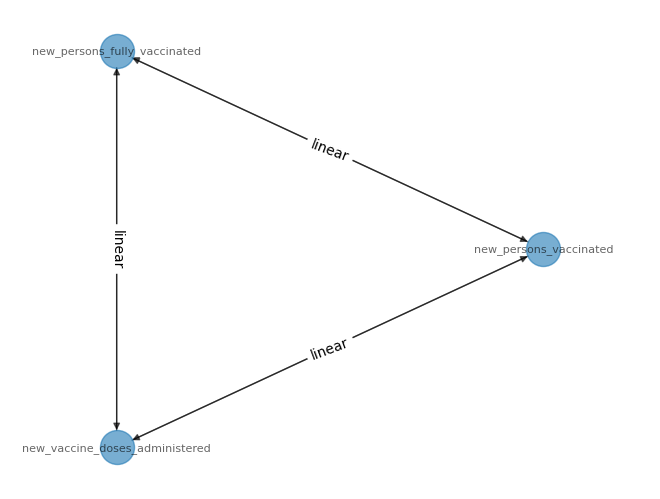

In [17]:
plot_a_network(nx.ego_graph(G_loaded.reverse(),'new_persons_fully_vaccinated',undirected=False,radius=2).reverse())

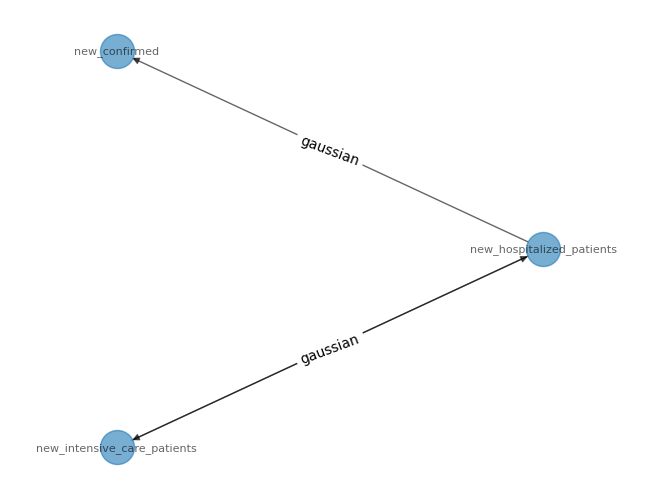

In [12]:
plot_a_network(nx.ego_graph(G_loaded.reverse(),'new_confirmed',undirected=False,radius=2).reverse())

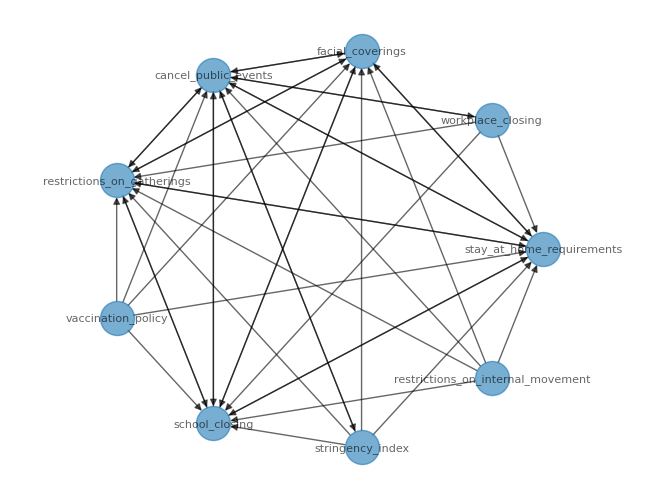

In [13]:
plot_a_network(nx.ego_graph(G_loaded.reverse(),'school_closing',undirected=False,radius=1).reverse(),type_label=False)

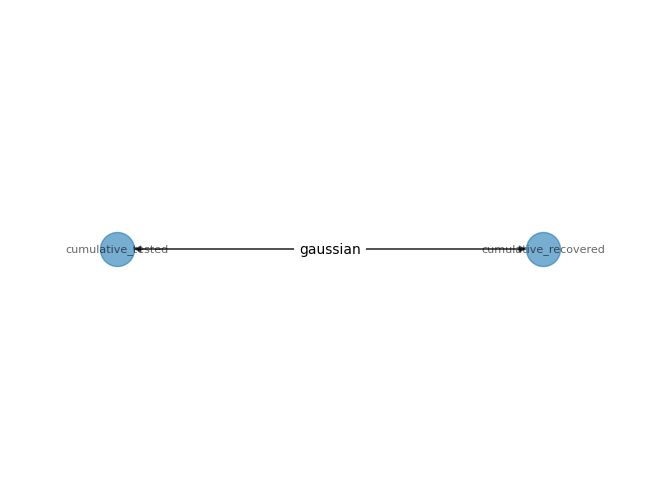

In [14]:
plot_a_network(nx.ego_graph(G_loaded.reverse(),'cumulative_recovered',undirected=False,radius=1).reverse())

# Remove cumulative

In [66]:
no_cumulatives=['new_hospitalized_patients',
       'current_hospitalized_patients', 'new_intensive_care_patients',
        'current_intensive_care_patients',
       'school_closing', 'workplace_closing', 'cancel_public_events',
       'restrictions_on_gatherings', 'public_transport_closing',
       'stay_at_home_requirements', 'restrictions_on_internal_movement',
       'income_support', 'facial_coverings', 'vaccination_policy',
       'stringency_index', 'new_confirmed', 'new_deceased', 'new_recovered',
       'new_tested', 'new_persons_vaccinated',
       'new_persons_fully_vaccinated',
        'new_vaccine_doses_administered']
X_no_cumul=df[no_cumulatives].to_numpy()
X_no_cumul=(X_no_cumul-onp.mean(X_no_cumul,axis=0))/onp.std(X_no_cumul,axis=0)

In [67]:
graph_discovery_no_cumul=GraphDiscoveryNew(X_no_cumul.T,beta,onp.array(no_cumulatives),l=1)

Computing kernel matrix


inspecting new_hospitalized_patients
linear kernel (using gamma=1.33e+00)
 n/(n+s)=0.78, Z=-15.34
decision : refused
quadratic kernel (using gamma=5.10e-07)
 n/(n+s)=1.00, Z=-1.03
decision : refused
gaussian kernel (using gamma=2.06e-02)
 n/(n+s)=0.24, Z=-1.97
decision : accepted
new_hospitalized_patients has ancestors with gaussian kernel (n/(s+n)=0.24)
ancestors after pruning:  ['current_hospitalized_patients'] 



inspecting current_hospitalized_patients
linear kernel (using gamma=1.68e+00)
 n/(n+s)=0.61, Z=-15.52
decision : refused
quadratic kernel (using gamma=8.44e-06)
 n/(n+s)=0.99, Z=-3.76
decision : refused
gaussian kernel (using gamma=3.49e-02)
 n/(n+s)=0.08, Z=-2.43
decision : accepted
current_hospitalized_patients has ancestors with gaussian kernel (n/(s+n)=0.08)
ancestors after pruning:  ['new_recovered'] 



inspecting new_intensive_care_patients
linear kernel (using gamma=1.37e+00)
 n/(n+s)=0.75, Z=-15.39
decision : refused
quadratic kernel (using gamma=4.94e-07)
 n/(n+s

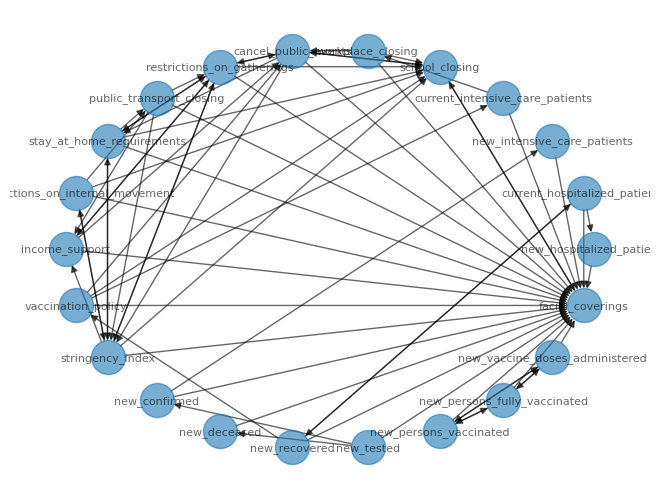

In [78]:
for node in graph_discovery_no_cumul.names:
    print(f'inspecting {node}')
    graph_discovery_no_cumul.find_ancestors(node,gamma='auto',kPCA='no')
    print('\n')
graph_discovery_no_cumul.plot_graph()

In [79]:
graph_discovery_no_cumul.G.remove_node('facial_coverings')

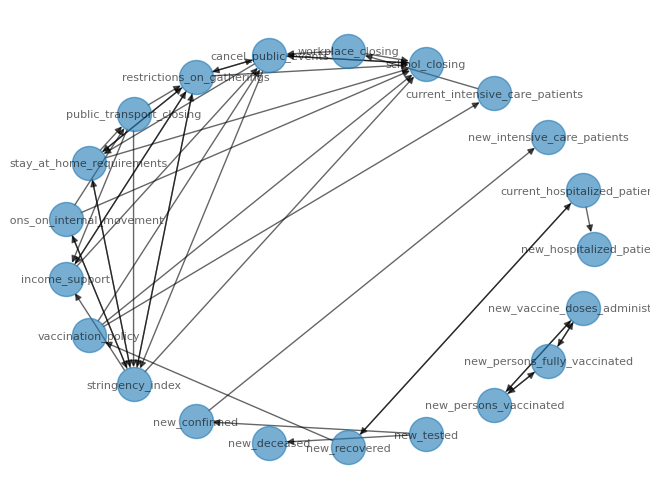

In [80]:

plot_a_network(graph_discovery_no_cumul.G)

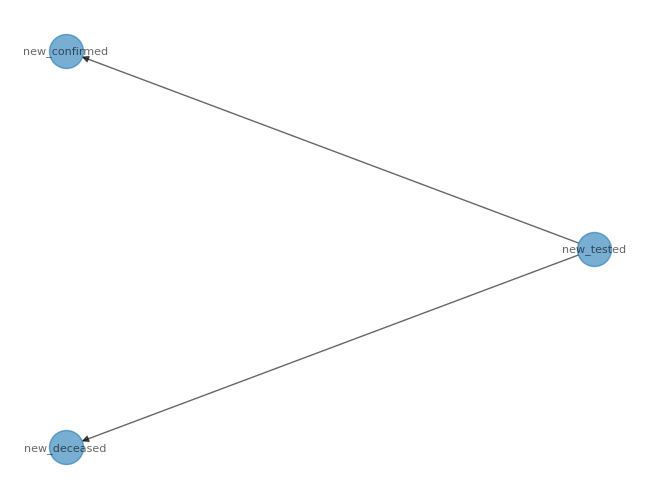

In [81]:
plot_a_network(nx.ego_graph(graph_discovery_no_cumul.G.reverse(),'new_tested',undirected=True,radius=1).reverse())

# Delete redundant information

In [7]:
reduced_names = ['new_hospitalized_patients',
       'current_hospitalized_patients','current_intensive_care_patients',
       'restrictions_on_internal_movement', 'new_confirmed', 'new_deceased',# 'new_recovered',
       'new_tested', #'cumulative_deceased',
       'new_vaccine_doses_administered']

In [8]:

X_reduced=df[reduced_names].to_numpy()
X_reduced=(X_reduced-onp.mean(X_reduced,axis=0))/onp.std(X_reduced,axis=0)

In [9]:

graph_discovery_reduced=GraphDiscoveryNew(X_reduced.T,beta,onp.array(reduced_names),l=1)

Computing kernel matrix


inspecting new_hospitalized_patients


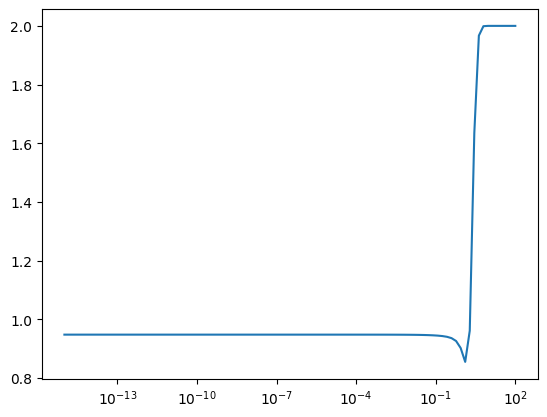

/Users/theobourdais/Desktop/Caltech/Research/Computational hypergraph discovery/GraphDiscovery/newGraphDiscovery.py:214: RuntimeWarning: overflow encountered in exp
  vals=1/(1+eigenvalues*onp.exp(-gamma_log))


optimisation result 0.0
linear kernel (using gamma=1.00e-09)
 n/(n+s)=1.00, Z=4.74
decision : refused


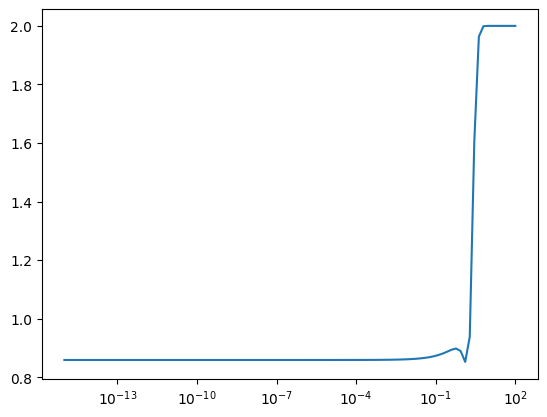

optimisation result 0.8233243234606574
quadratic kernel (using gamma=1.65e-02)
 n/(n+s)=0.96, Z=-12.52
decision : refused


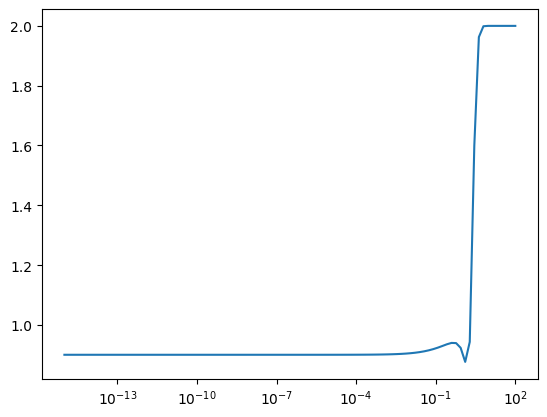

optimisation result 1.0239725733995897e-12
gaussian kernel (using gamma=9.55e-09)
 n/(n+s)=0.39, Z=-0.85
decision : accepted
new_hospitalized_patients has ancestors with gaussian kernel (n/(s+n)=0.39)
ancestors : ['current_hospitalized_patients', 'current_intensive_care_patients', 'new_confirmed', 'new_deceased', 'new_tested', 'new_vaccine_doses_administered']
 n/(n+s)=0.38, Z=-1.32
decision : accepted
ancestors : ['current_hospitalized_patients', 'current_intensive_care_patients', 'new_confirmed', 'new_deceased', 'new_tested']
 n/(n+s)=0.63, Z=-3.18
decision : accepted
ancestors : ['current_intensive_care_patients', 'new_confirmed', 'new_deceased', 'new_tested']
 n/(n+s)=0.74, Z=-5.25
decision : accepted
ancestors : ['current_intensive_care_patients', 'new_deceased', 'new_tested']
 n/(n+s)=0.93, Z=-2.27
decision : refused
ancestors after pruning:  ['current_intensive_care_patients', 'new_confirmed', 'new_deceased', 'new_tested'] 



inspecting current_hospitalized_patients


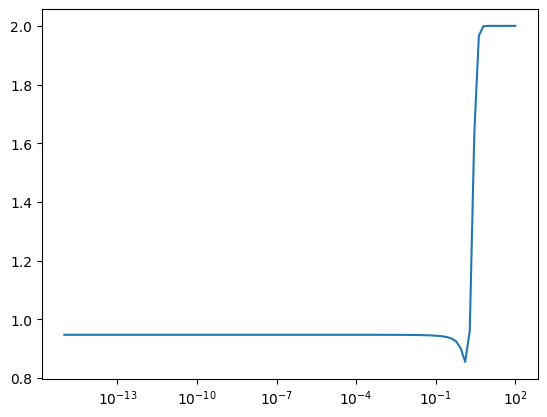

optimisation result 0.0
linear kernel (using gamma=1.00e-09)
 n/(n+s)=1.00, Z=6.75
decision : refused


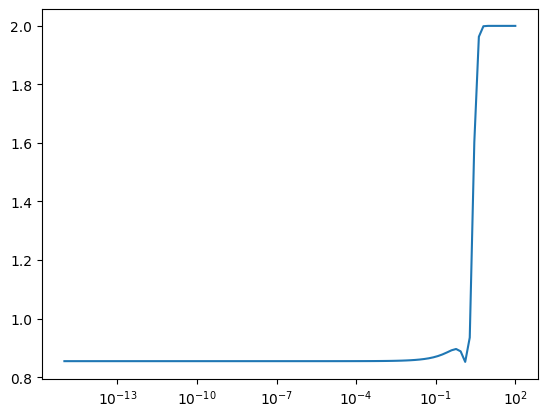

optimisation result 0.8206990033730359
quadratic kernel (using gamma=3.06e-02)
 n/(n+s)=0.96, Z=-11.77
decision : refused


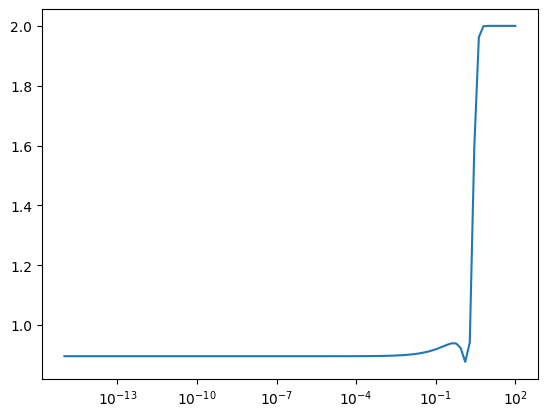

optimisation result 7.227381887409123e-12
gaussian kernel (using gamma=4.15e-08)
 n/(n+s)=0.12, Z=-2.10
decision : accepted
current_hospitalized_patients has ancestors with gaussian kernel (n/(s+n)=0.12)
ancestors : ['new_hospitalized_patients', 'current_intensive_care_patients', 'new_confirmed', 'new_deceased', 'new_tested', 'new_vaccine_doses_administered']
 n/(n+s)=0.27, Z=-2.52
decision : accepted
ancestors : ['new_hospitalized_patients', 'current_intensive_care_patients', 'new_confirmed', 'new_deceased', 'new_tested']
 n/(n+s)=0.58, Z=-4.55
decision : accepted
ancestors : ['new_hospitalized_patients', 'current_intensive_care_patients', 'new_confirmed', 'new_tested']
 n/(n+s)=0.75, Z=-6.58
decision : accepted
ancestors : ['current_intensive_care_patients', 'new_confirmed', 'new_tested']
 n/(n+s)=0.93, Z=-4.28
decision : refused
ancestors after pruning:  ['new_hospitalized_patients', 'current_intensive_care_patients', 'new_confirmed', 'new_tested'] 



inspecting current_intensive_c

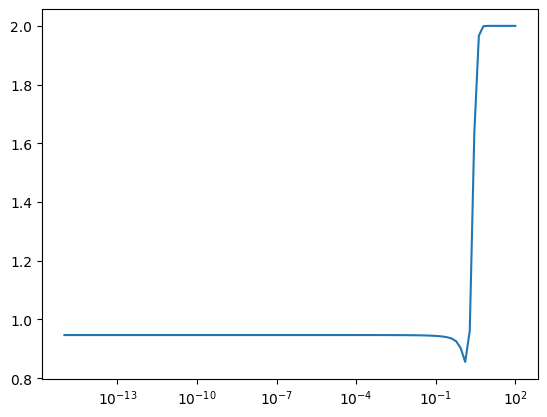

optimisation result 0.0
linear kernel (using gamma=1.00e-09)
 n/(n+s)=1.00, Z=-2.32
decision : refused


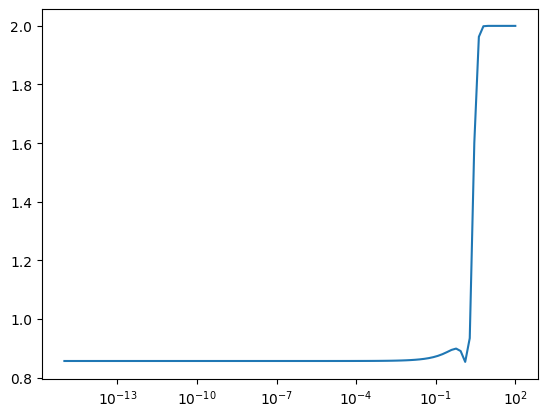

optimisation result 0.8211556740125826
quadratic kernel (using gamma=2.46e-02)
 n/(n+s)=0.96, Z=-12.37
decision : refused


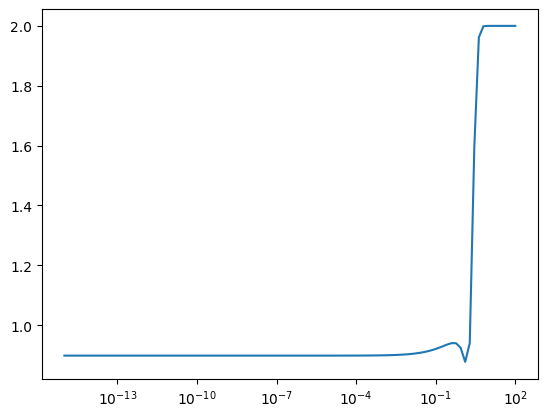

optimisation result 0.0
gaussian kernel (using gamma=1.00e-09)
 n/(n+s)=0.30, Z=-0.29
decision : accepted
current_intensive_care_patients has ancestors with gaussian kernel (n/(s+n)=0.30)
ancestors : ['new_hospitalized_patients', 'current_hospitalized_patients', 'new_confirmed', 'new_deceased', 'new_tested', 'new_vaccine_doses_administered']
 n/(n+s)=0.14, Z=-0.89
decision : accepted
ancestors : ['new_hospitalized_patients', 'current_hospitalized_patients', 'new_deceased', 'new_tested', 'new_vaccine_doses_administered']
 n/(n+s)=0.25, Z=-2.07
decision : accepted
ancestors : ['new_hospitalized_patients', 'current_hospitalized_patients', 'new_deceased', 'new_tested']
 n/(n+s)=0.70, Z=-4.20
decision : accepted
ancestors : ['new_hospitalized_patients', 'current_hospitalized_patients', 'new_deceased']
 n/(n+s)=0.93, Z=-3.56
decision : refused
ancestors after pruning:  ['new_hospitalized_patients', 'current_hospitalized_patients', 'new_deceased', 'new_tested'] 



inspecting restrictions_on_

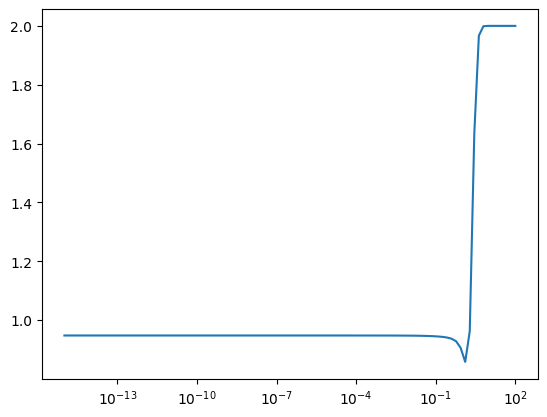

optimisation result 0.0
linear kernel (using gamma=1.00e-09)
 n/(n+s)=1.00, Z=4.08
decision : refused


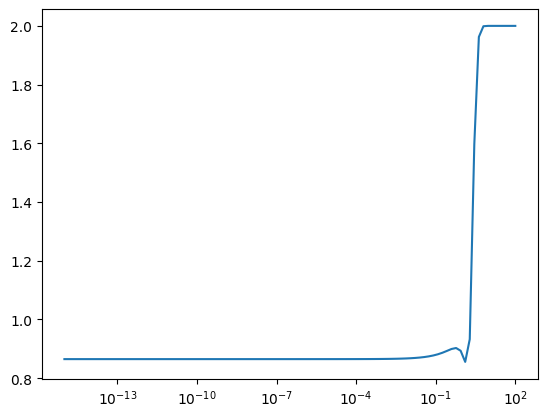

optimisation result 0.8184324711139705
quadratic kernel (using gamma=1.15e-02)
 n/(n+s)=0.98, Z=-9.45
decision : refused


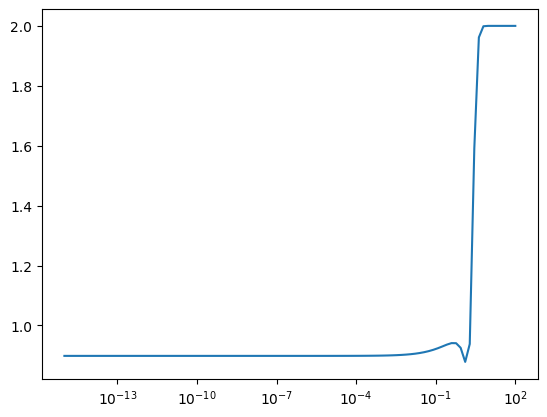

optimisation result 5.793879265247881e-12
gaussian kernel (using gamma=1.37e-07)
 n/(n+s)=0.05, Z=-2.61
decision : accepted
restrictions_on_internal_movement has ancestors with gaussian kernel (n/(s+n)=0.05)
ancestors : ['new_hospitalized_patients', 'current_intensive_care_patients', 'new_confirmed', 'new_deceased', 'new_tested', 'new_vaccine_doses_administered']
 n/(n+s)=0.29, Z=-3.34
decision : accepted
ancestors : ['new_hospitalized_patients', 'current_intensive_care_patients', 'new_deceased', 'new_tested', 'new_vaccine_doses_administered']
 n/(n+s)=0.70, Z=-1.24
decision : refused
ancestors after pruning:  ['new_hospitalized_patients', 'current_intensive_care_patients', 'new_confirmed', 'new_deceased', 'new_tested', 'new_vaccine_doses_administered'] 



inspecting new_confirmed


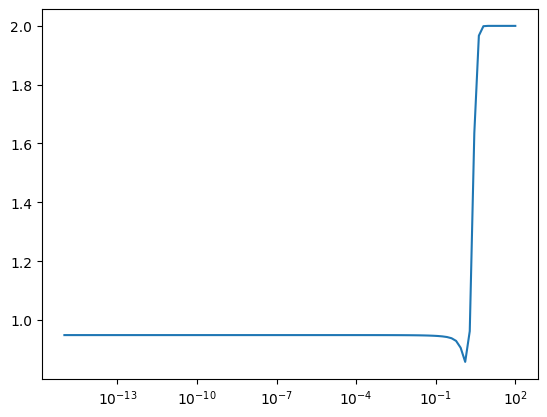

optimisation result 0.0
linear kernel (using gamma=1.00e-09)
 n/(n+s)=1.00, Z=-4.64
decision : refused


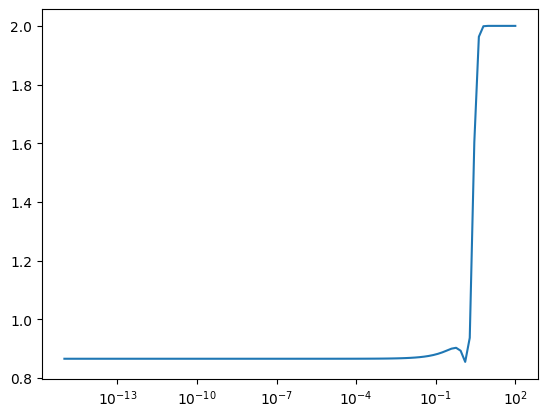

optimisation result 0.8243799929329125
quadratic kernel (using gamma=1.06e-02)
 n/(n+s)=0.97, Z=-11.34
decision : refused


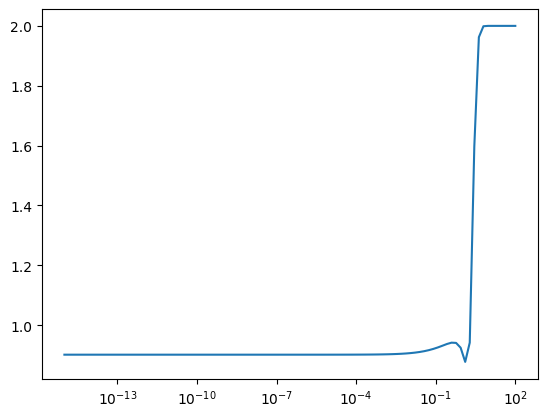

optimisation result 2.001458027089953e-12
gaussian kernel (using gamma=3.23e-08)
 n/(n+s)=0.07, Z=-2.08
decision : accepted
new_confirmed has ancestors with gaussian kernel (n/(s+n)=0.07)
ancestors : ['new_hospitalized_patients', 'current_hospitalized_patients', 'current_intensive_care_patients', 'restrictions_on_internal_movement', 'new_deceased', 'new_tested']
 n/(n+s)=0.25, Z=-4.00
decision : accepted
ancestors : ['new_hospitalized_patients', 'current_hospitalized_patients', 'current_intensive_care_patients', 'new_deceased', 'new_tested']
 n/(n+s)=0.42, Z=-5.27
decision : accepted
ancestors : ['new_hospitalized_patients', 'current_hospitalized_patients', 'new_deceased', 'new_tested']
 n/(n+s)=0.78, Z=-5.35
decision : accepted
ancestors : ['new_hospitalized_patients', 'current_hospitalized_patients', 'new_tested']
 n/(n+s)=0.93, Z=-4.34
decision : refused
ancestors after pruning:  ['new_hospitalized_patients', 'current_hospitalized_patients', 'new_deceased', 'new_tested'] 



inspect

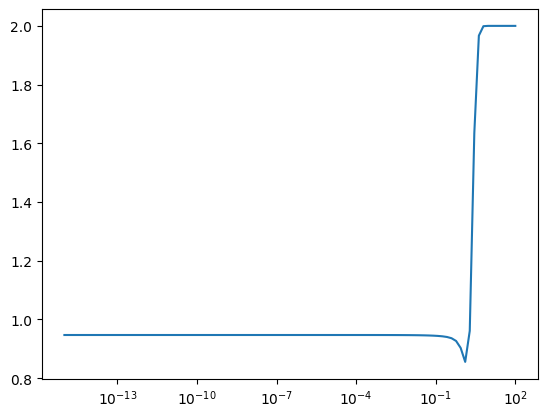

optimisation result 0.0
linear kernel (using gamma=1.00e-09)
 n/(n+s)=1.00, Z=-8.79
decision : refused


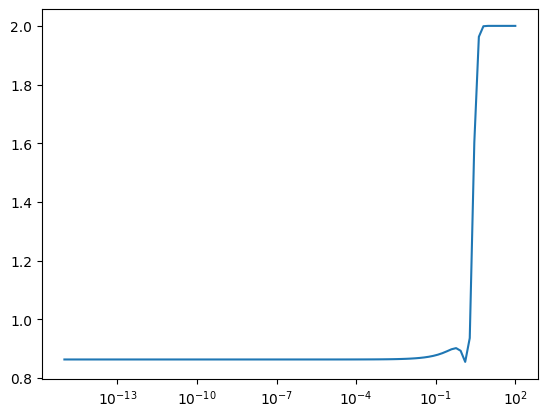

optimisation result 0.8233877343409097
quadratic kernel (using gamma=1.21e-02)
 n/(n+s)=0.97, Z=-10.51
decision : refused


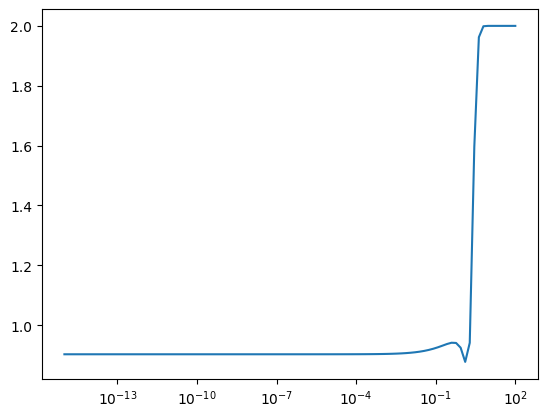

optimisation result 2.5127989966566844e-12
gaussian kernel (using gamma=1.30e-08)
 n/(n+s)=0.17, Z=-1.94
decision : accepted
new_deceased has ancestors with gaussian kernel (n/(s+n)=0.17)
ancestors : ['new_hospitalized_patients', 'current_hospitalized_patients', 'current_intensive_care_patients', 'new_confirmed', 'new_tested', 'new_vaccine_doses_administered']
 n/(n+s)=0.22, Z=-2.46
decision : accepted
ancestors : ['new_hospitalized_patients', 'current_hospitalized_patients', 'current_intensive_care_patients', 'new_tested', 'new_vaccine_doses_administered']
 n/(n+s)=0.54, Z=-2.98
decision : accepted
ancestors : ['new_hospitalized_patients', 'current_intensive_care_patients', 'new_tested', 'new_vaccine_doses_administered']
 n/(n+s)=0.78, Z=-3.17
decision : accepted
ancestors : ['new_hospitalized_patients', 'current_intensive_care_patients', 'new_vaccine_doses_administered']
 n/(n+s)=0.91, Z=-4.61
decision : refused
ancestors after pruning:  ['new_hospitalized_patients', 'current_intensi

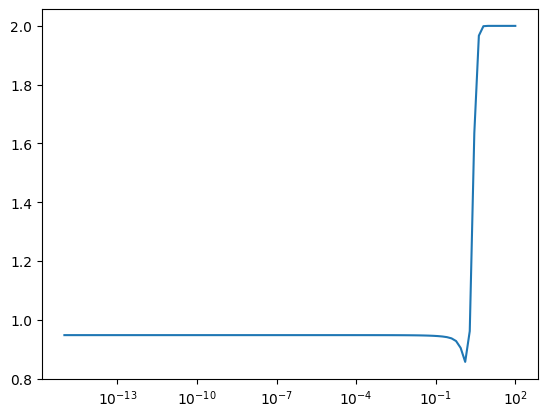

optimisation result 0.0
linear kernel (using gamma=1.00e-09)
 n/(n+s)=1.00, Z=-9.78
decision : refused


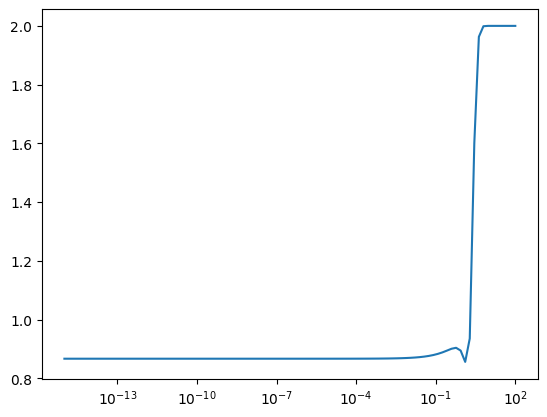

optimisation result 0.8239139225789169
quadratic kernel (using gamma=1.22e-02)
 n/(n+s)=0.96, Z=-12.56
decision : refused


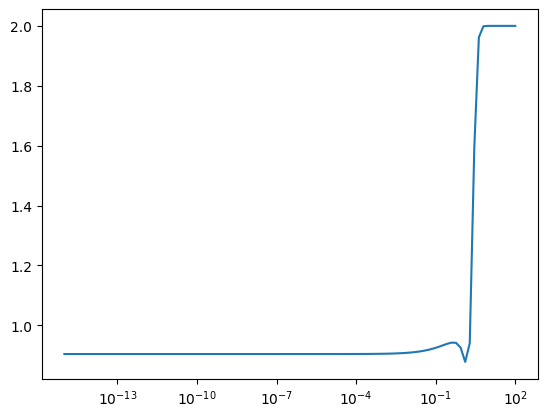

optimisation result 0.0
gaussian kernel (using gamma=1.00e-09)
 n/(n+s)=0.43, Z=-0.80
decision : accepted
new_tested has ancestors with gaussian kernel (n/(s+n)=0.43)
ancestors : ['new_hospitalized_patients', 'current_hospitalized_patients', 'current_intensive_care_patients', 'new_confirmed', 'new_deceased', 'new_vaccine_doses_administered']
 n/(n+s)=0.58, Z=-0.38
decision : refused
ancestors after pruning:  ['new_hospitalized_patients', 'current_hospitalized_patients', 'current_intensive_care_patients', 'restrictions_on_internal_movement', 'new_confirmed', 'new_deceased', 'new_vaccine_doses_administered'] 



inspecting new_vaccine_doses_administered


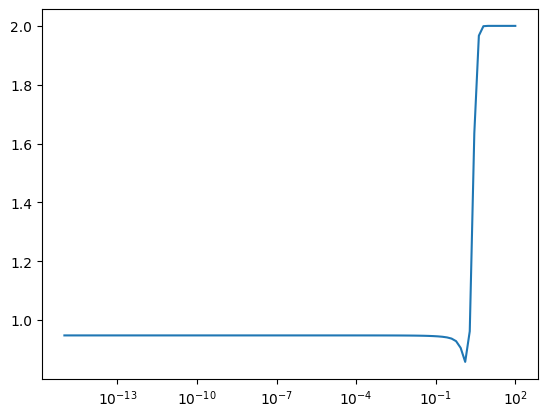

optimisation result 0.0
linear kernel (using gamma=1.00e-09)
 n/(n+s)=1.00, Z=4.96
decision : refused


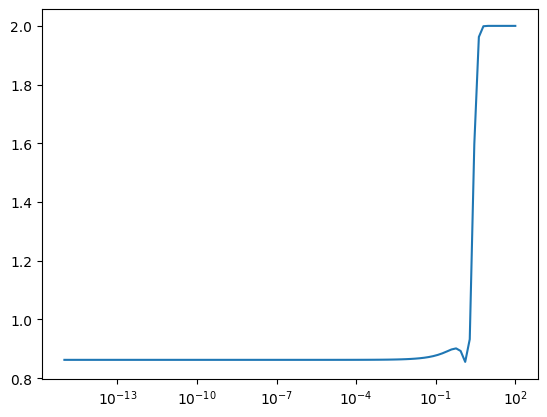

optimisation result 0.8229082088001125
quadratic kernel (using gamma=1.39e-02)
 n/(n+s)=0.96, Z=-12.71
decision : refused


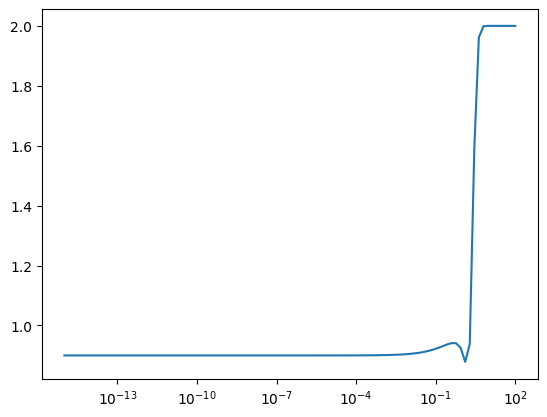

optimisation result 1.8421202063745312e-12
gaussian kernel (using gamma=8.08e-09)
 n/(n+s)=0.34, Z=-1.16
decision : accepted
new_vaccine_doses_administered has ancestors with gaussian kernel (n/(s+n)=0.34)
ancestors : ['new_hospitalized_patients', 'current_hospitalized_patients', 'current_intensive_care_patients', 'restrictions_on_internal_movement', 'new_deceased', 'new_tested']
 n/(n+s)=0.41, Z=-2.28
decision : accepted
ancestors : ['new_hospitalized_patients', 'current_hospitalized_patients', 'current_intensive_care_patients', 'new_deceased', 'new_tested']
 n/(n+s)=0.58, Z=-2.72
decision : accepted
ancestors : ['new_hospitalized_patients', 'current_intensive_care_patients', 'new_deceased', 'new_tested']
 n/(n+s)=0.84, Z=-0.52
decision : refused
ancestors after pruning:  ['new_hospitalized_patients', 'current_hospitalized_patients', 'current_intensive_care_patients', 'new_deceased', 'new_tested'] 





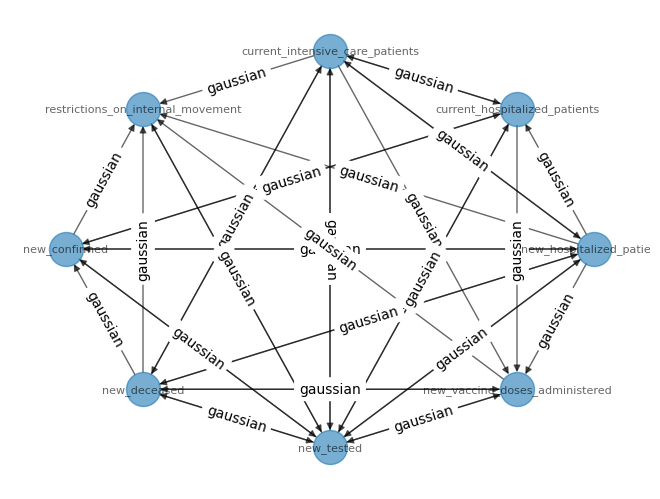

In [10]:
for node in graph_discovery_reduced.names:
    print(f'inspecting {node}')
    graph_discovery_reduced.find_ancestors(node,gamma='auto',kPCA='no')
    print('\n')
graph_discovery_reduced.plot_graph()

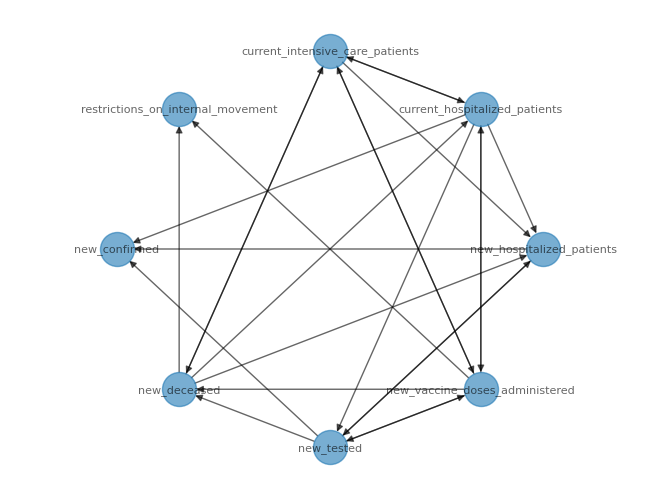

In [48]:
plot_a_network(graph_discovery_reduced.G,False)

# Testing SIR

Computing kernel matrix
inspecting S
linear kernel (using gamma=4.45e+00)
 n/(n+s)=0.89, Z=-15.77
decision : refused
quadratic kernel (using gamma=1.06e-01)
 n/(n+s)=0.58, Z=-15.70
decision : refused
gaussian kernel (using gamma=4.88e-07)
 n/(n+s)=0.89, Z=-14.20
decision : accepted
S has ancestors with gaussian kernel (n/(s+n)=0.89)
ancestors : ['I', 'R', 'dS', 'dR']
 n/(n+s)=0.93, Z=-14.42
decision : refused
ancestors after pruning:  ['I', 'R', 'dS', 'dI', 'dR'] 



inspecting I
linear kernel (using gamma=1.63e+01)
 n/(n+s)=0.20, Z=-15.86
decision : accepted
I has ancestors with linear kernel (n/(s+n)=0.20)
ancestors : ['S', 'R', 'dS', 'dR']
 n/(n+s)=0.20, Z=-15.87
decision : accepted
ancestors : ['S', 'R', 'dR']
 n/(n+s)=0.22, Z=-15.88
decision : accepted
ancestors : ['R', 'dR']
 n/(n+s)=0.20, Z=-15.89
decision : accepted
ancestors : ['R']
 n/(n+s)=0.24, Z=-15.89
decision : accepted
ancestors after pruning:  ['R'] 



inspecting R
linear kernel (using gamma=1.65e+01)
 n/(n+s)=0.19, Z

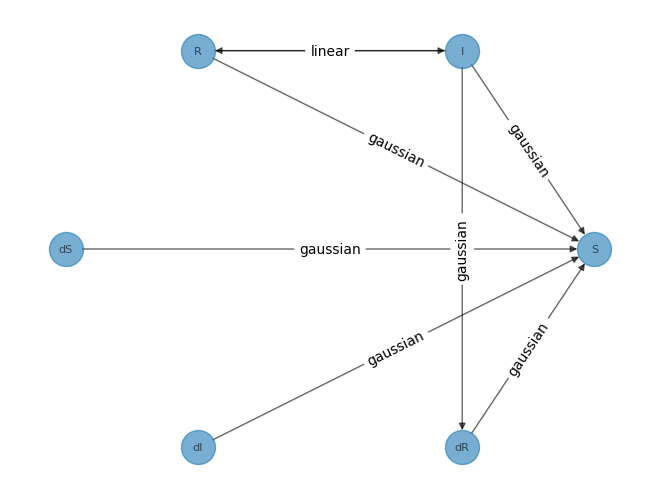

In [49]:
SIR_names=['cumulative_confirmed', 'cumulative_deceased',
       'cumulative_recovered',
       'cumulative_persons_fully_vaccinated','new_confirmed','new_recovered']

total_pop=67.57e6
SIR_names=['S','I','R','dS','dI','dR']
S=total_pop-df['cumulative_deceased']-df['cumulative_persons_fully_vaccinated']
I=df['cumulative_confirmed']-df['cumulative_recovered']
R=df['cumulative_recovered']
dS=-df['new_deceased']-df['new_persons_vaccinated']
dI=df['new_confirmed']
dR=df['new_recovered']



#X_SIR=df[SIR_names].to_numpy()
X_SIR=pd.concat([S,I,R,dS,dI,dR],axis=1).to_numpy()
X_SIR=(X_SIR-onp.mean(X_SIR,axis=0))/onp.std(X_SIR,axis=0)
graph_discovery_SIR=GraphDiscoveryNew(X_SIR.T,beta,onp.array(SIR_names),l=5)

for node in graph_discovery_SIR.names:
    print(f'inspecting {node}')
    graph_discovery_SIR.find_ancestors(node,gamma='auto',kPCA='no')
    print('\n')
graph_discovery_SIR.plot_graph()